    Steps:-
    1.Data Loading
    2.Data Cleaning
    3.Exploratory Data Analysis
    4.Encoding and PCA
    5.Model training and comparison
    6.Hyperparameter Tuning
    7.Conclusion


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FInal_Train_Data.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

Unnamed: 0  pain chest  shortness of breath  dizziness  asthenia  fall  \
0           0           0                    1          0         0     0   
1           0           0                    1          0         0     0   
2           0           0                    0          0         0     0   
3           0           1                    1          0         0     0   
4           0           0                    1          0         0     0   

   syncope  vertigo  sweat sweating increased  palpitation  nausea  \
0        1        0                         1            1       0   
1        0        0                         1            0       1   
2        0        0                         0            0       0   
3        0        0                         1            0       0   
4        0        0                         0            0       0   

   angina pectoris  pressure chest  polyuria  polydypsia  orthopnea  rale  \
0                1               0         0           0          0     0   
1                0               0         0           0          0     1   
2                0               0         0           0          0     0   
3                1               0         0           0          1     0   
4                0               0         0           0          0     1   

   unresponsiveness  mental status changes  vomiting  labored breathing  \
0                 0                      0         0                  0   
1                 1                      1         1                  0   
2                 0                      0         0                  0   
3                 0                      0         0                  0   
4                 0                      0         0                  0   

   feeling suicidal  suicidal  hallucinations auditory  feeling hopeless  \
0                 0         0                        0                 0   
1                 0         0                        0                 0   
2                 0         0                        0                 0   
3                 0         0                        0                 0   
4                 0         0                        0                 0   

   weepiness  sleeplessness  motor retardation  irritable mood  blackout  \
0          0              0                  0               0         0   
1          0              0                  0               0         0   
2          0              1                  0               0         0   
3          0              0                  0               0         0   
4          0              0                  0               0         0   

   mood depressed  hallucinations visual  worry  agitation  tremor  \
0               0                      0      0          0       0   
1               0                      0      0          0       0   
2               0                      0      1          0       0   
3               0                      0      0          0       0   
4               0                      0      0          0       0   

   intoxication  verbal auditory hallucinations  energy increased  difficulty  \
0             0                               0                 0           0   
1             0                               0                 0           0   
2             0                               0                 1           0   
3             0                               0                 0           0   
4             0                               0                 0           0   

   nightmare  unable to concentrate  homelessness  hypokinesia  \
0          0                      0             0            0   
1          0                      0             0            0   
2          0                      0             1            0   
3          0                      0             0            0   
4          0                      0             0    

In [ ]:
df.shape

(2564, 402)

there are 2564 rows and 402 colmuns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Columns: 402 entries, Unnamed: 0 to prognosis
dtypes: int64(401), object(1)
memory usage: 7.9+ MB


## Data Cleaning

#### Checking columns with missing values

In [ ]:
df.isnull().sum()

Unnamed: 0                                     0
pain chest                                     0
shortness of breath                            0
dizziness                                      0
asthenia                                       0
fall                                           0
syncope                                        0
vertigo                                        0
sweat sweating increased                       0
palpitation                                    0
nausea                                         0
angina pectoris                                0
pressure chest                                 0
polyuria                                       0
polydypsia                                     0
orthopnea                                      0
rale                                           0
unresponsiveness                               0
mental status changes                          0
vomiting                                       0
labored breathing   

this column contains only null values so we would drop it

#### Checking if there is any symptom that donot occur in any disease

In [ ]:
df.drop('prognosis',axis=1).sum()[df.drop('prognosis',axis=1).sum()==0]

Unnamed: 0    0
dtype: int64

there is a symtom column Unnamed: 0 that is not present in any disease so we can safely remove it as well

#### Dropping columns that are not required

In [ ]:
sorted(df.columns)

["Heberden's node",
 "Murphy's sign",
 "Stahli's line",
 'Unnamed: 0',
 'Unnamed: 145',
 'abdomen acute',
 'abdominal bloating',
 'abdominal tenderness',
 'abnormal sensation',
 'abnormally hard consistency',
 'abortion',
 'abscess bacterial',
 'absences finding',
 'achalasia',
 'ache',
 'adverse reaction adverse effect',
 'agitation',
 'air fluid level',
 'alcohol binge episode',
 'alcoholic withdrawal symptoms',
 'ambidexterity',
 'angina pectoris',
 'anorexia',
 'anosmia',
 'aphagia',
 'apyrexial',
 'arthralgia',
 'ascites',
 'asterixis',
 'asthenia',
 'asymptomatic',
 'ataxia',
 'atypia',
 'aura',
 'awakening early',
 'barking cough',
 'bedridden bedridden',
 'behavior hyperactive',
 'behavior showing increased motor activity',
 'blackout',
 'blanch',
 'bleeding of vagina',
 'bowel sounds decreased',
 'bradycardia',
 'bradykinesia',
 'breakthrough pain',
 'breath sounds decreased',
 'breath-holding spell',
 'breech presentation',
 'bruit',
 'burning sensation',
 'cachexia',
 'cardi

On a carefull look we find that there are 2 columns as well which must be removed Unnamed: 145 and \xa0

In [ ]:
df.drop(axis=1,columns=['Unnamed: 0','Unnamed: 145','\xa0'],inplace=True)

there is \xa0 also present between name so we replace it with space

In [ ]:
new_names=[]
for name in df.columns:
  nams=name.replace('\xa0',' ')
  new_names.append(name)
df.columns=new_names

In [ ]:
sorted(df.columns)

["Heberden's node",
 "Murphy's sign",
 "Stahli's line",
 'abdomen acute',
 'abdominal bloating',
 'abdominal tenderness',
 'abnormal sensation',
 'abnormally hard consistency',
 'abortion',
 'abscess bacterial',
 'absences finding',
 'achalasia',
 'ache',
 'adverse reaction adverse effect',
 'agitation',
 'air fluid level',
 'alcohol binge episode',
 'alcoholic withdrawal symptoms',
 'ambidexterity',
 'angina pectoris',
 'anorexia',
 'anosmia',
 'aphagia',
 'apyrexial',
 'arthralgia',
 'ascites',
 'asterixis',
 'asthenia',
 'asymptomatic',
 'ataxia',
 'atypia',
 'aura',
 'awakening early',
 'barking cough',
 'bedridden bedridden',
 'behavior hyperactive',
 'behavior showing increased motor activity',
 'blackout',
 'blanch',
 'bleeding of vagina',
 'bowel sounds decreased',
 'bradycardia',
 'bradykinesia',
 'breakthrough pain',
 'breath sounds decreased',
 'breath-holding spell',
 'breech presentation',
 'bruit',
 'burning sensation',
 'cachexia',
 'cardiomegaly',
 'cardiovascular findi

#### Dropping duplicate rows

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2551, 399)

Now only 399 symptoms are present which occur in atleast one of the disease and 2551 unique rows which vastly reduces the dataset

##Exploratory Data Analysis

<Axes: ylabel='count'>

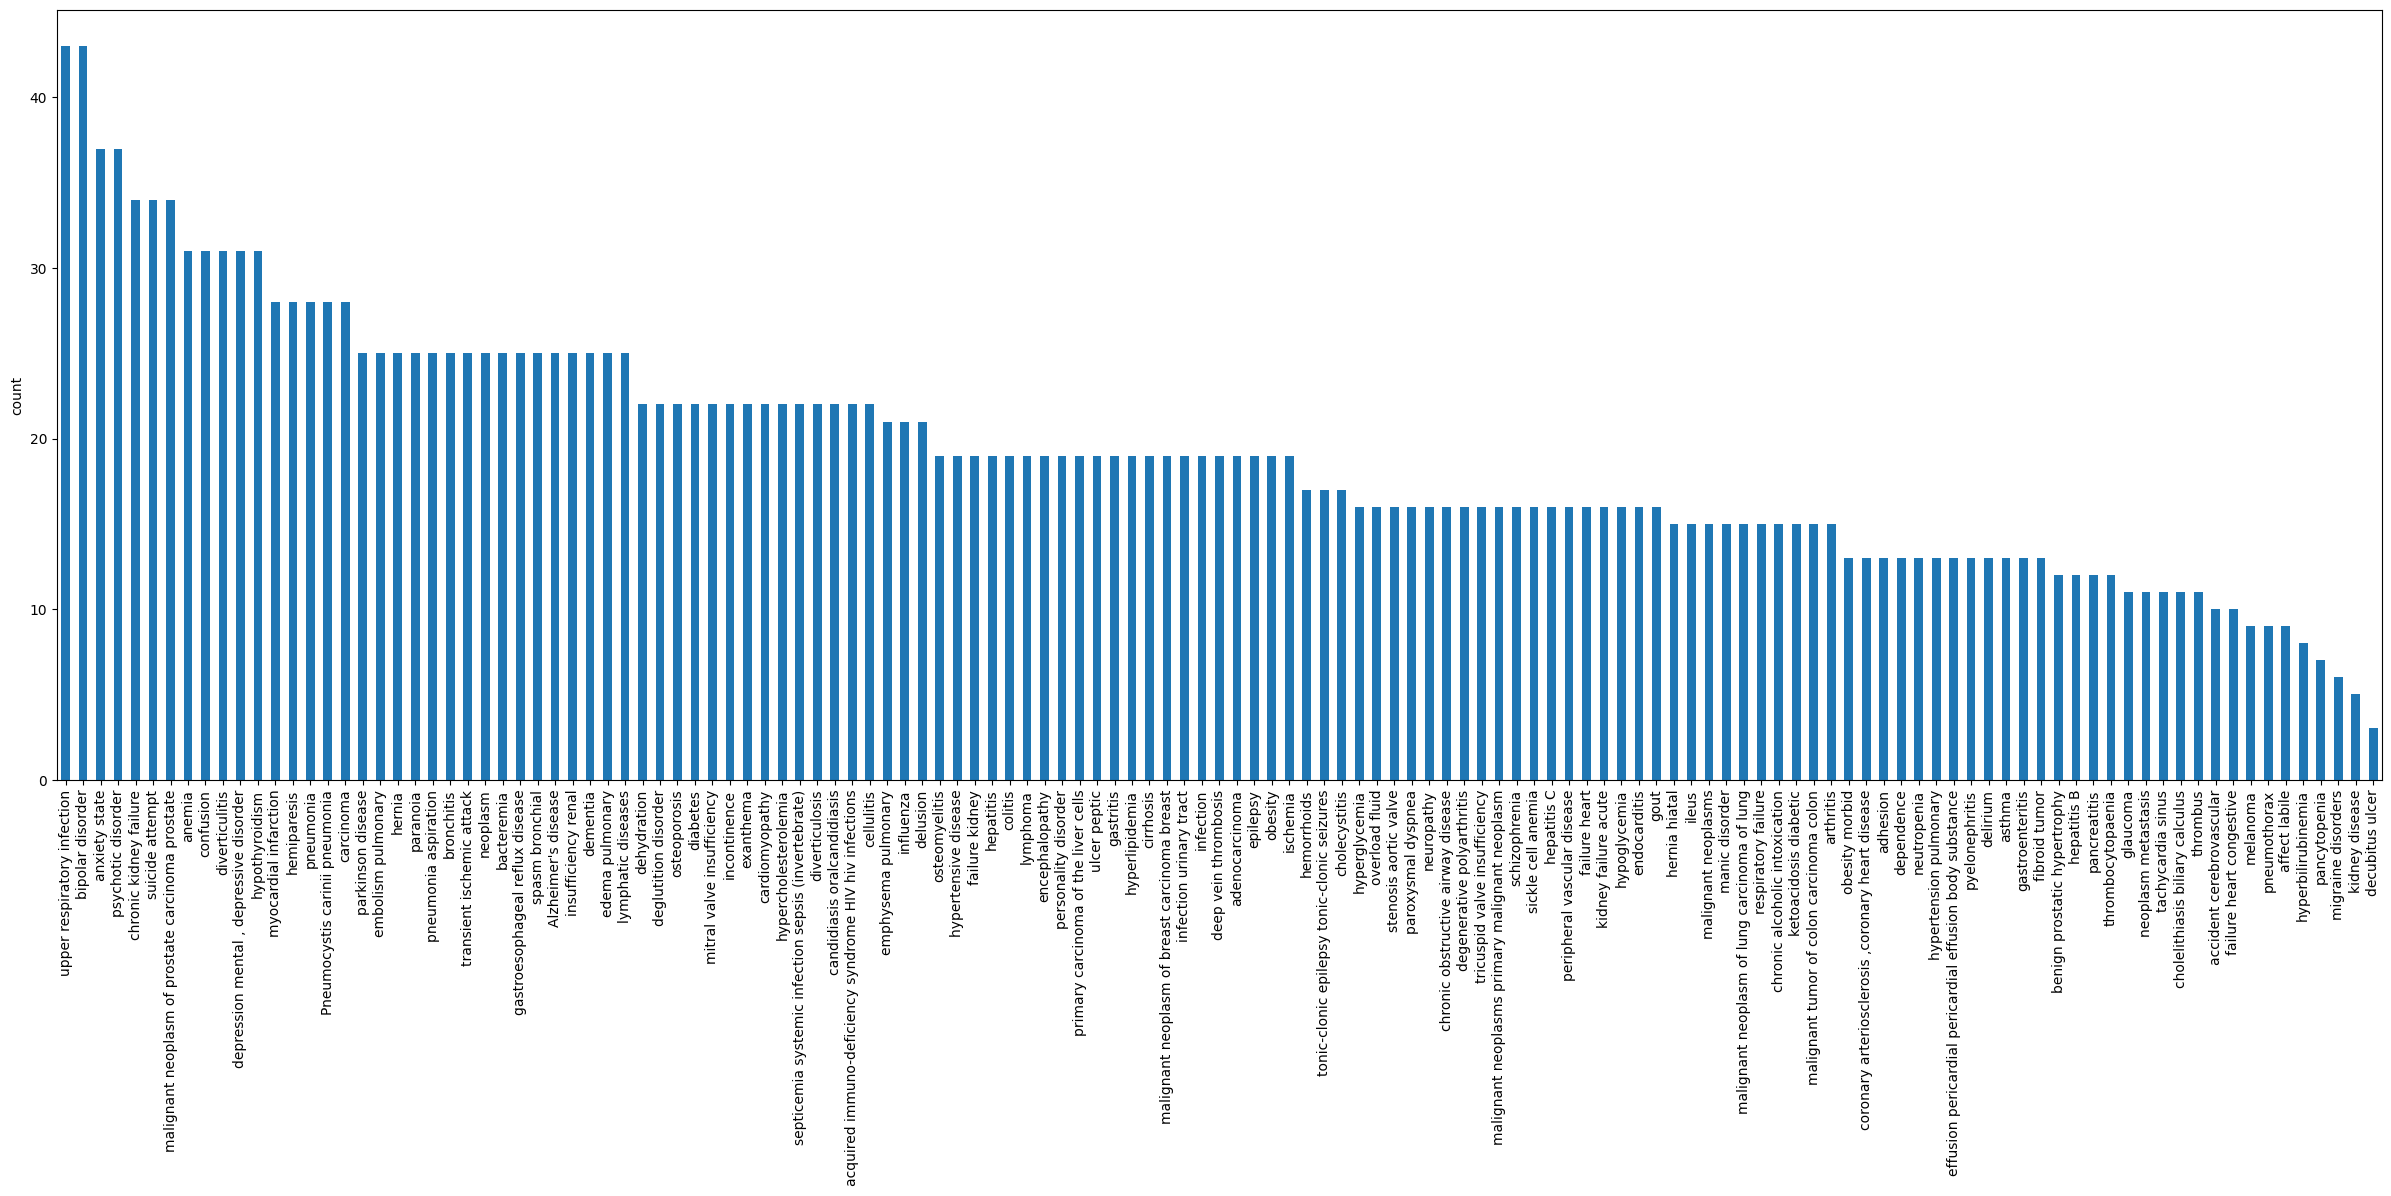

In [ ]:
plt.figure(figsize=(30,10))
(df['prognosis'].value_counts()).plot(kind='bar',ylabel="count")

###Symptoms and the count of diseases they appear in

In [ ]:
sym = (df.groupby('prognosis').sum()>0).sum().sort_values(ascending=False)
sym

shortness of breath                            46
pain                                           41
fever                                          33
pain abdominal                                 27
diarrhea                                       24
vomiting                                       24
unresponsiveness                               22
asthenia                                       22
dyspnea                                        22
cough                                          22
nausea                                         22
pain chest                                     20
chill                                          20
decreased body weight                          19
apyrexial                                      19
agitation                                      18
rale                                           18
mass of body structure                         17
lesion                                         17
sore to touch                                  16


##### Observation:
It can be observed that shortness of breath, pain and vomiting occur in many diseases. Based on this we can also find 10 most common symtoms that occur

In [ ]:
data = df.drop('prognosis',axis=1)

Top 10 most occuring Diseases

<Axes: title={'center': 'Top 10 most common symptoms'}, xlabel='Symtoms', ylabel='Number of diseases'>

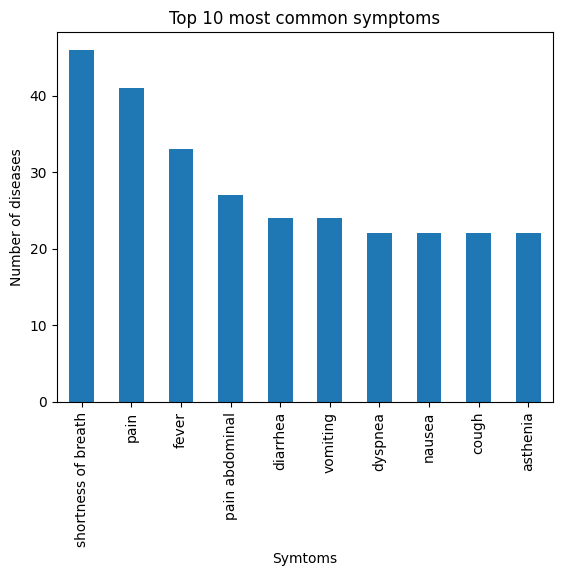

In [ ]:
(df.groupby('prognosis').sum()>0).sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 most common symptoms',xlabel="Symtoms",ylabel="Number of diseases")

list of Least occuring diseases

In [ ]:
(df.groupby('prognosis').sum()>0).sum().sort_values(ascending=True).head(204).index.to_list()

['homicidal thoughts',
 'sciatica',
 'frothy sputum',
 'retropulsion',
 'hypersomnolence',
 'underweight underweight',
 'red blotches',
 'prostate tender',
 'pain foot',
 'disequilibrium',
 'urinoma',
 'no status change',
 'breakthrough pain',
 'pansystolic murmur',
 'barking cough',
 "Heberden's node",
 'rapid shallow breathing',
 'nasal discharge present',
 'macerated skin',
 'dysdiadochokinesia',
 'monocytosis',
 'posterior\xa0rhinorrhea',
 'incoherent',
 'lameness claudication',
 'fecaluria',
 'pneumatouria',
 'todd paralysis',
 'alcoholic withdrawal symptoms',
 'dyspareunia',
 'floppy',
 'st segment elevation',
 'noisy respiration',
 'inappropriate affect',
 'passed stones',
 'pulse absent',
 'heavy feeling',
 'rest pain',
 'hypometabolism',
 'photopsia',
 'anosmia',
 'syncope blackout history of - blackout',
 'hyperhidrosis disorder',
 'unwell',
 'mydriasis',
 'immobile',
 'pain in lower limb',
 'exhaustion',
 'r wave feature',
 'overweight',
 'dysesthesia',
 'throbbing sensation

Finding the diseases in which aforementioned symptoms occur

In [ ]:
sym_dis=pd.DataFrame(columns=['symptom','disease'])
for symptom in sym[sym==1].index.to_list():
  disease = df[df[symptom]>0]['prognosis'].unique()[0]
  sym_dis = pd.concat([sym_dis,pd.DataFrame([[symptom,disease]],columns=sym_dis.columns)],ignore_index=True)

In [ ]:
sym_dis

symptom  \
0                                     pain neck   
1                               feces in rectum   
2                                         drool   
3                                  dizzy spells   
4                                      prodrome   
5                         large-for-dates fetus   
6                                   proteinemia   
7                                      immobile   
8                            abdominal bloating   
9                              pin-point pupils   
10                                 primigravida   
11                              air fluid level   
12                        previous pregnancies    
13                               tremor resting   
14                              hypoproteinemia   
15                        alcohol binge episode   
16              adverse reaction adverse effect   
17                                     abortion   
18                                abdomen acute   
19                              catching breath   
20                intermenstrual heavy bleeding   
21                                 charleyhorse   
22                                shooting pain   
23                                        retch   
24                                low back pain   
25                      no known drug allergies   
26                       bowel sounds decreased   
27                                    sedentary   
28                                        choke   
29                        coordination abnormal   
30                         st segment elevation   
31                           feels hot/feverish   
32    behavior showing increased motor activity   
33                                  transsexual   
34                                        flare   
35                                      elation   
36                     pericardial friction rub   
37                                       blanch   
38                                        hoard   
39                                  hyperemesis   
40                                        panic   
41                         soft tissue swelling   
42                         breath-holding spell   
43                                        bruit   
44                                 rhd positive   
45                                nasal flaring   
46                                       sneeze   
47                                hypertonicity   
48                                Murphy's sign   
49                              rolling of eyes   
50                                  phonophobia   
51                           gasping for breath   
52                regurgitates after swallowing   
53                                        milky   
54                                    rest pain   
55                            noisy respiration   
56                               tonic seizures   
57                           stinging sensation   
58                                  dysesthesia   
59                                 pulse absent   
60                                          gag   
61                            excruciating pain   
62                             hyperventilation   
63                              fear of falling   
64   rigor - temperature-associated observation   
65                                  hypesthesia   
66                                 hematochezia   
67                                   clumsiness   
68                              rambling speech   
69                  throbbing sensation quality   
70                                 bradykinesia   
71                                      sniffle   
72                           pain in lower limb   
73                              Heberden's node   
74                           abnormal sensation   
75                               focal seizures   
76                                       unwell   
77       syncope blackout history of - blackout   
78         

#### Number of unique combinations of symptoms in a disease present in dataset

<Axes: xlabel='Disease', ylabel='count'>

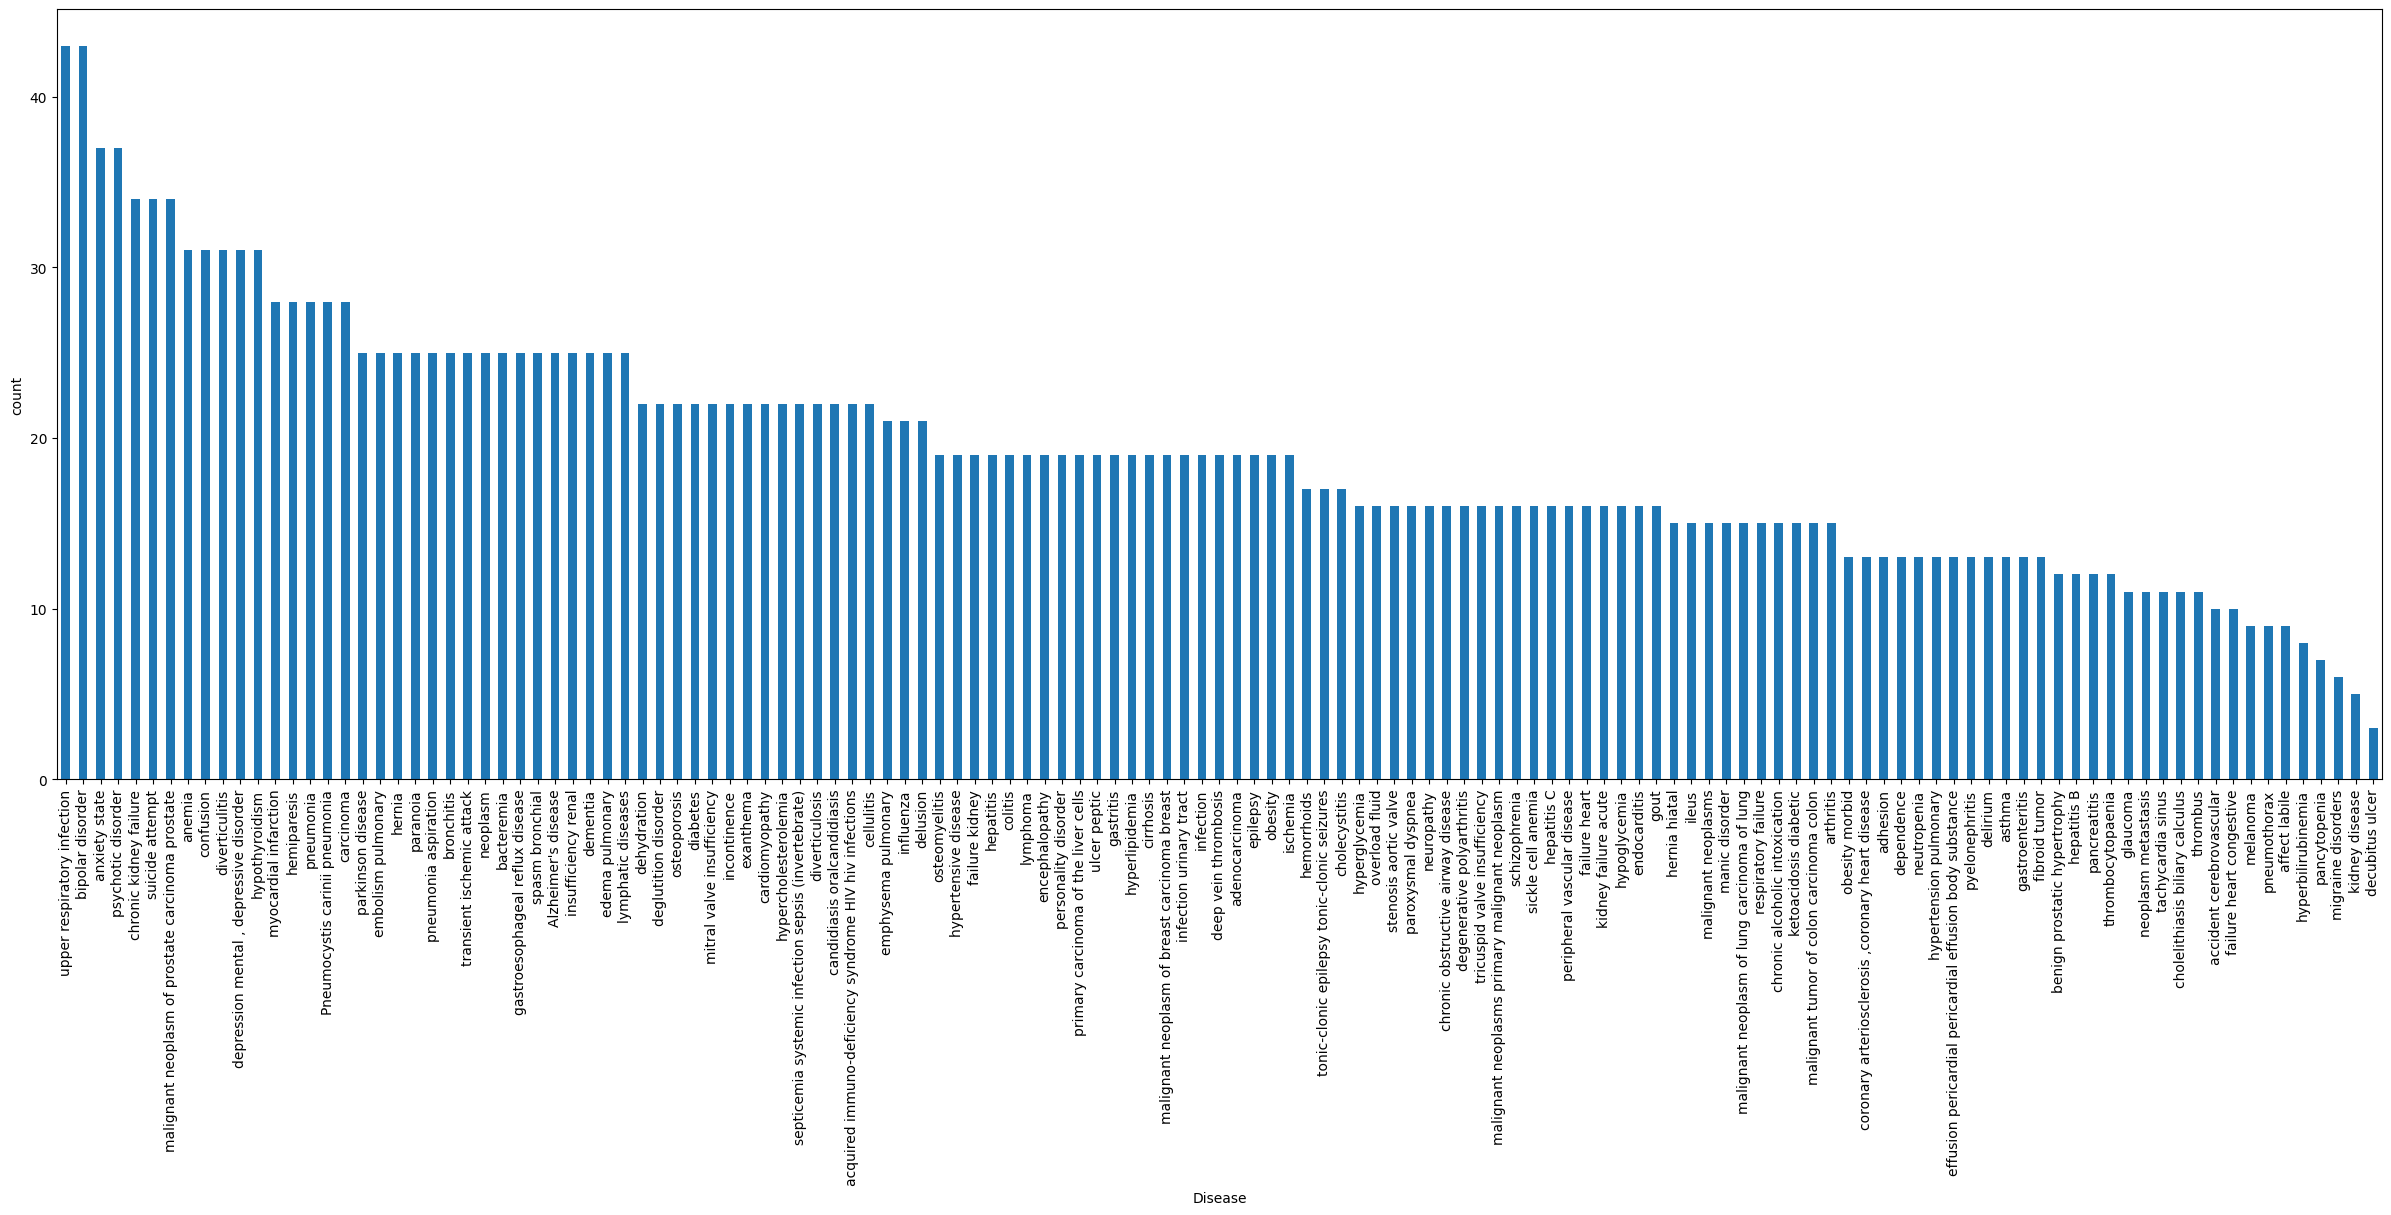

In [ ]:
plt.figure(figsize=(30,10))
df['prognosis'].value_counts().plot(kind='bar',xlabel='Disease',ylabel='count')

#### All diseases and various symptoms that can occur in them

In [ ]:
dis_sym=dict()
for val in df['prognosis'].unique():
    diseases=df[df['prognosis']==val].sum()[(df[df['prognosis']==val].sum()!=0)][:-1].index.to_list()
    dis_sym.update({val:diseases})
    print(val,"-",diseases,"\n\n")

hypertensive disease - ['pain chest', 'shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope', 'vertigo', 'sweat sweating increased', 'palpitation', 'nausea', 'angina pectoris', 'pressure chest'] 


diabetes - ['pain chest', 'shortness of breath', 'asthenia', 'vertigo', 'sweat sweating increased', 'nausea', 'polyuria', 'polydypsia', 'orthopnea', 'rale', 'unresponsiveness', 'mental status changes', 'vomiting', 'labored breathing'] 


depression mental , depressive disorder - ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeplessness', 'motor retardation', 'irritable mood', 'blackout', 'mood depressed', 'hallucinations visual', 'worry', 'agitation', 'tremor', 'intoxication', 'verbal auditory hallucinations', 'energy increased', 'difficulty', 'nightmare', 'unable to concentrate', 'homelessness'] 


coronary arteriosclerosis ,coronary heart disease - ['pain chest', 'shortness of breath', 'sweat sweating increased', 'angina pectoris

###Crosstabulation between symptom and prognosis

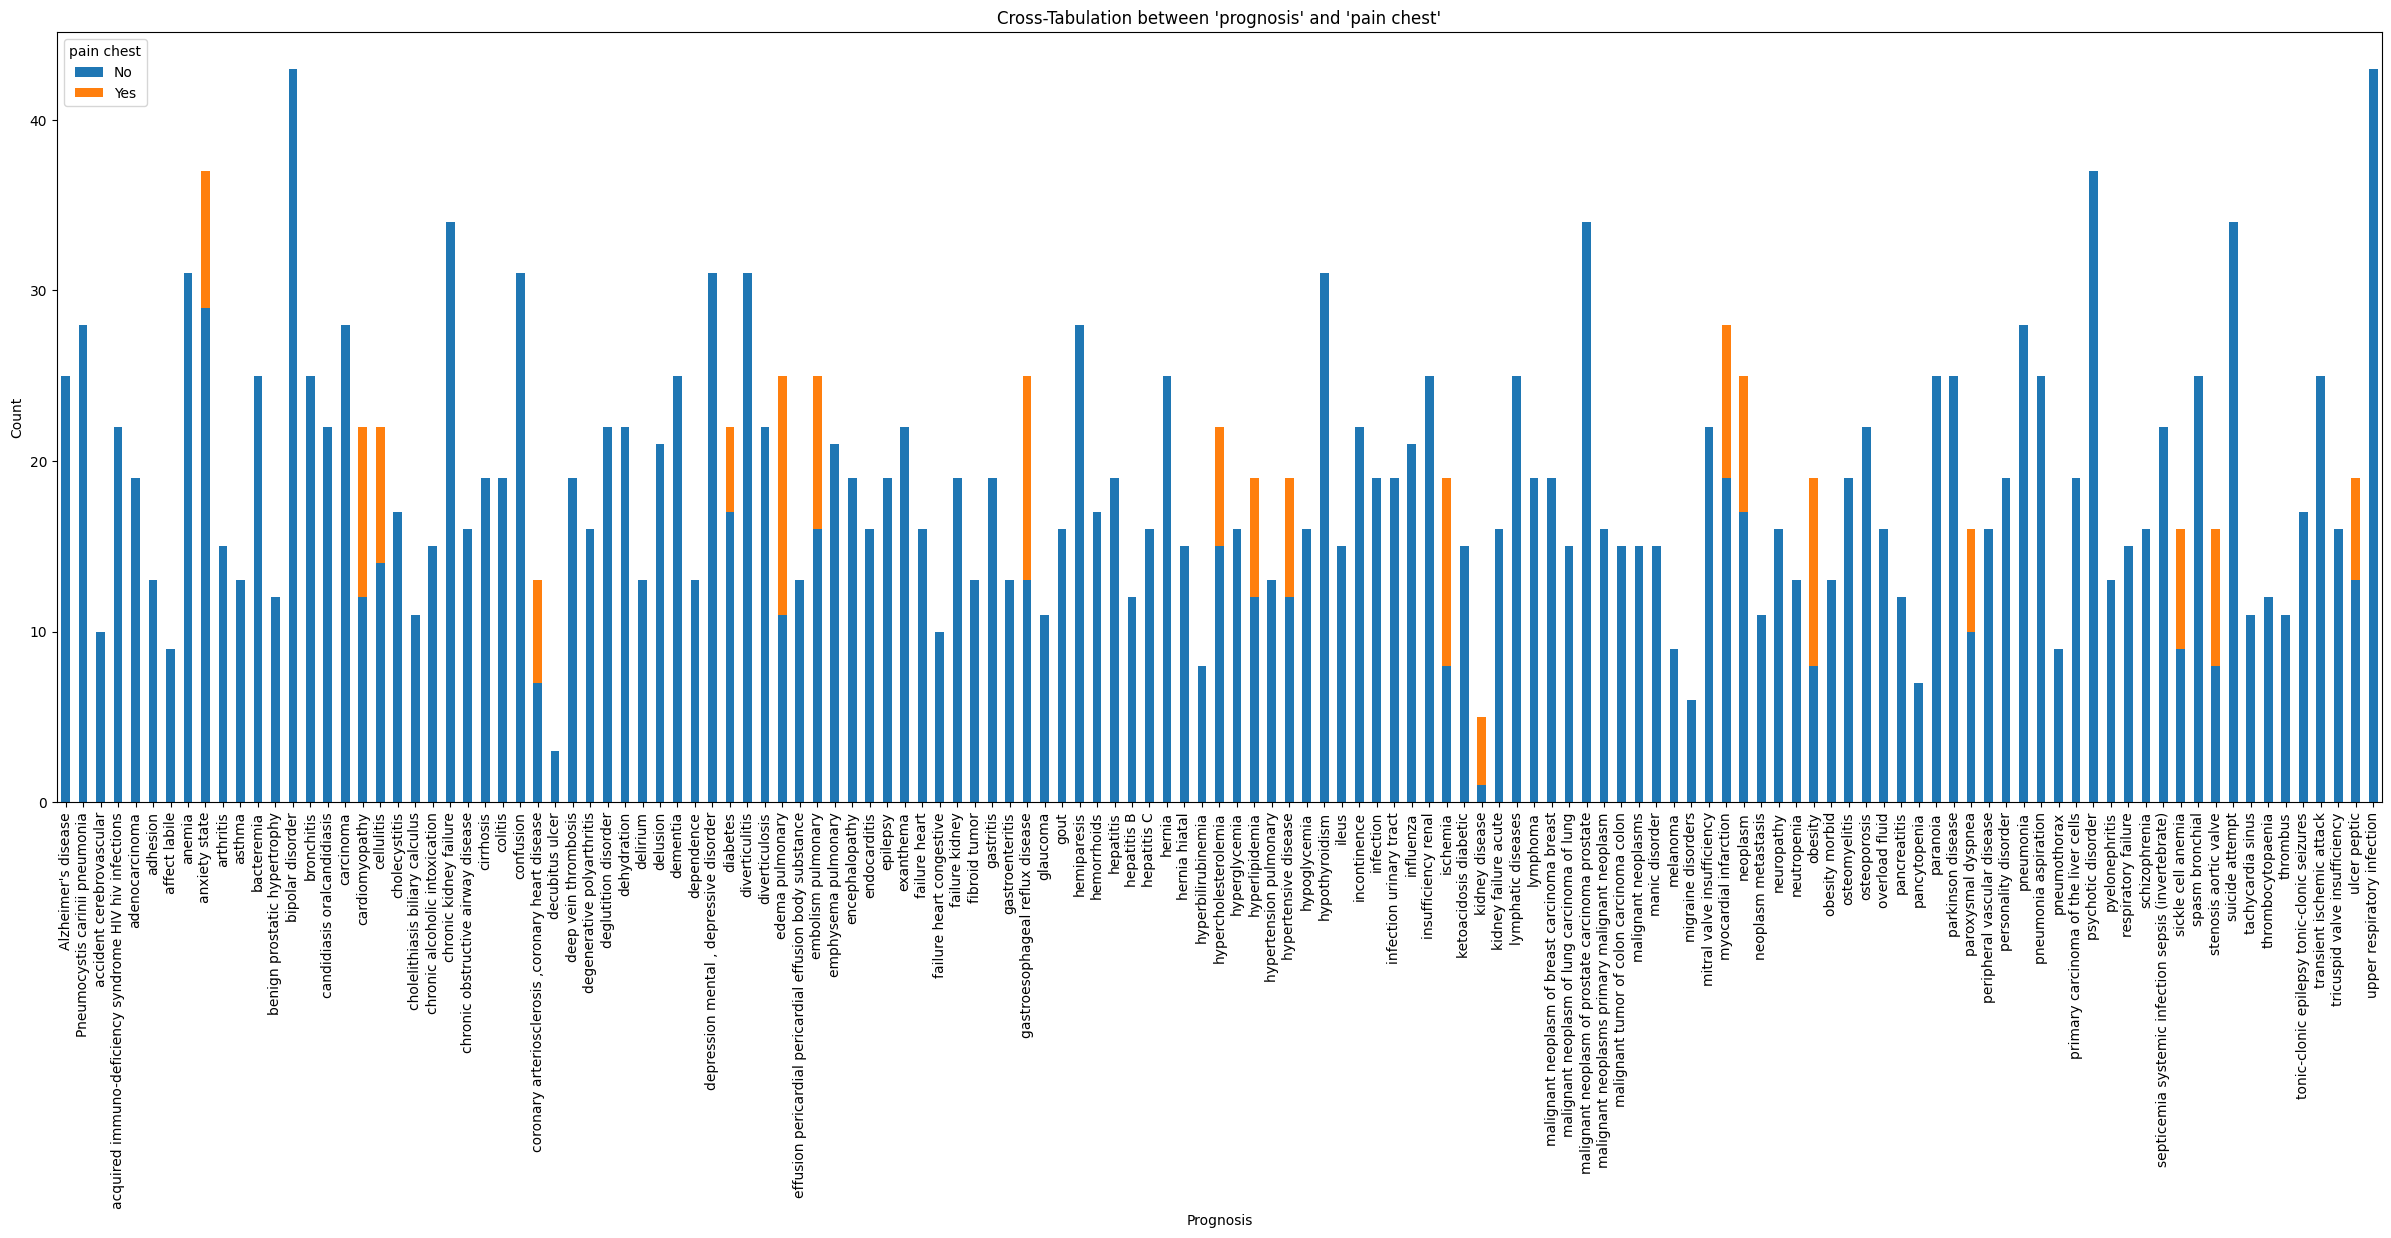

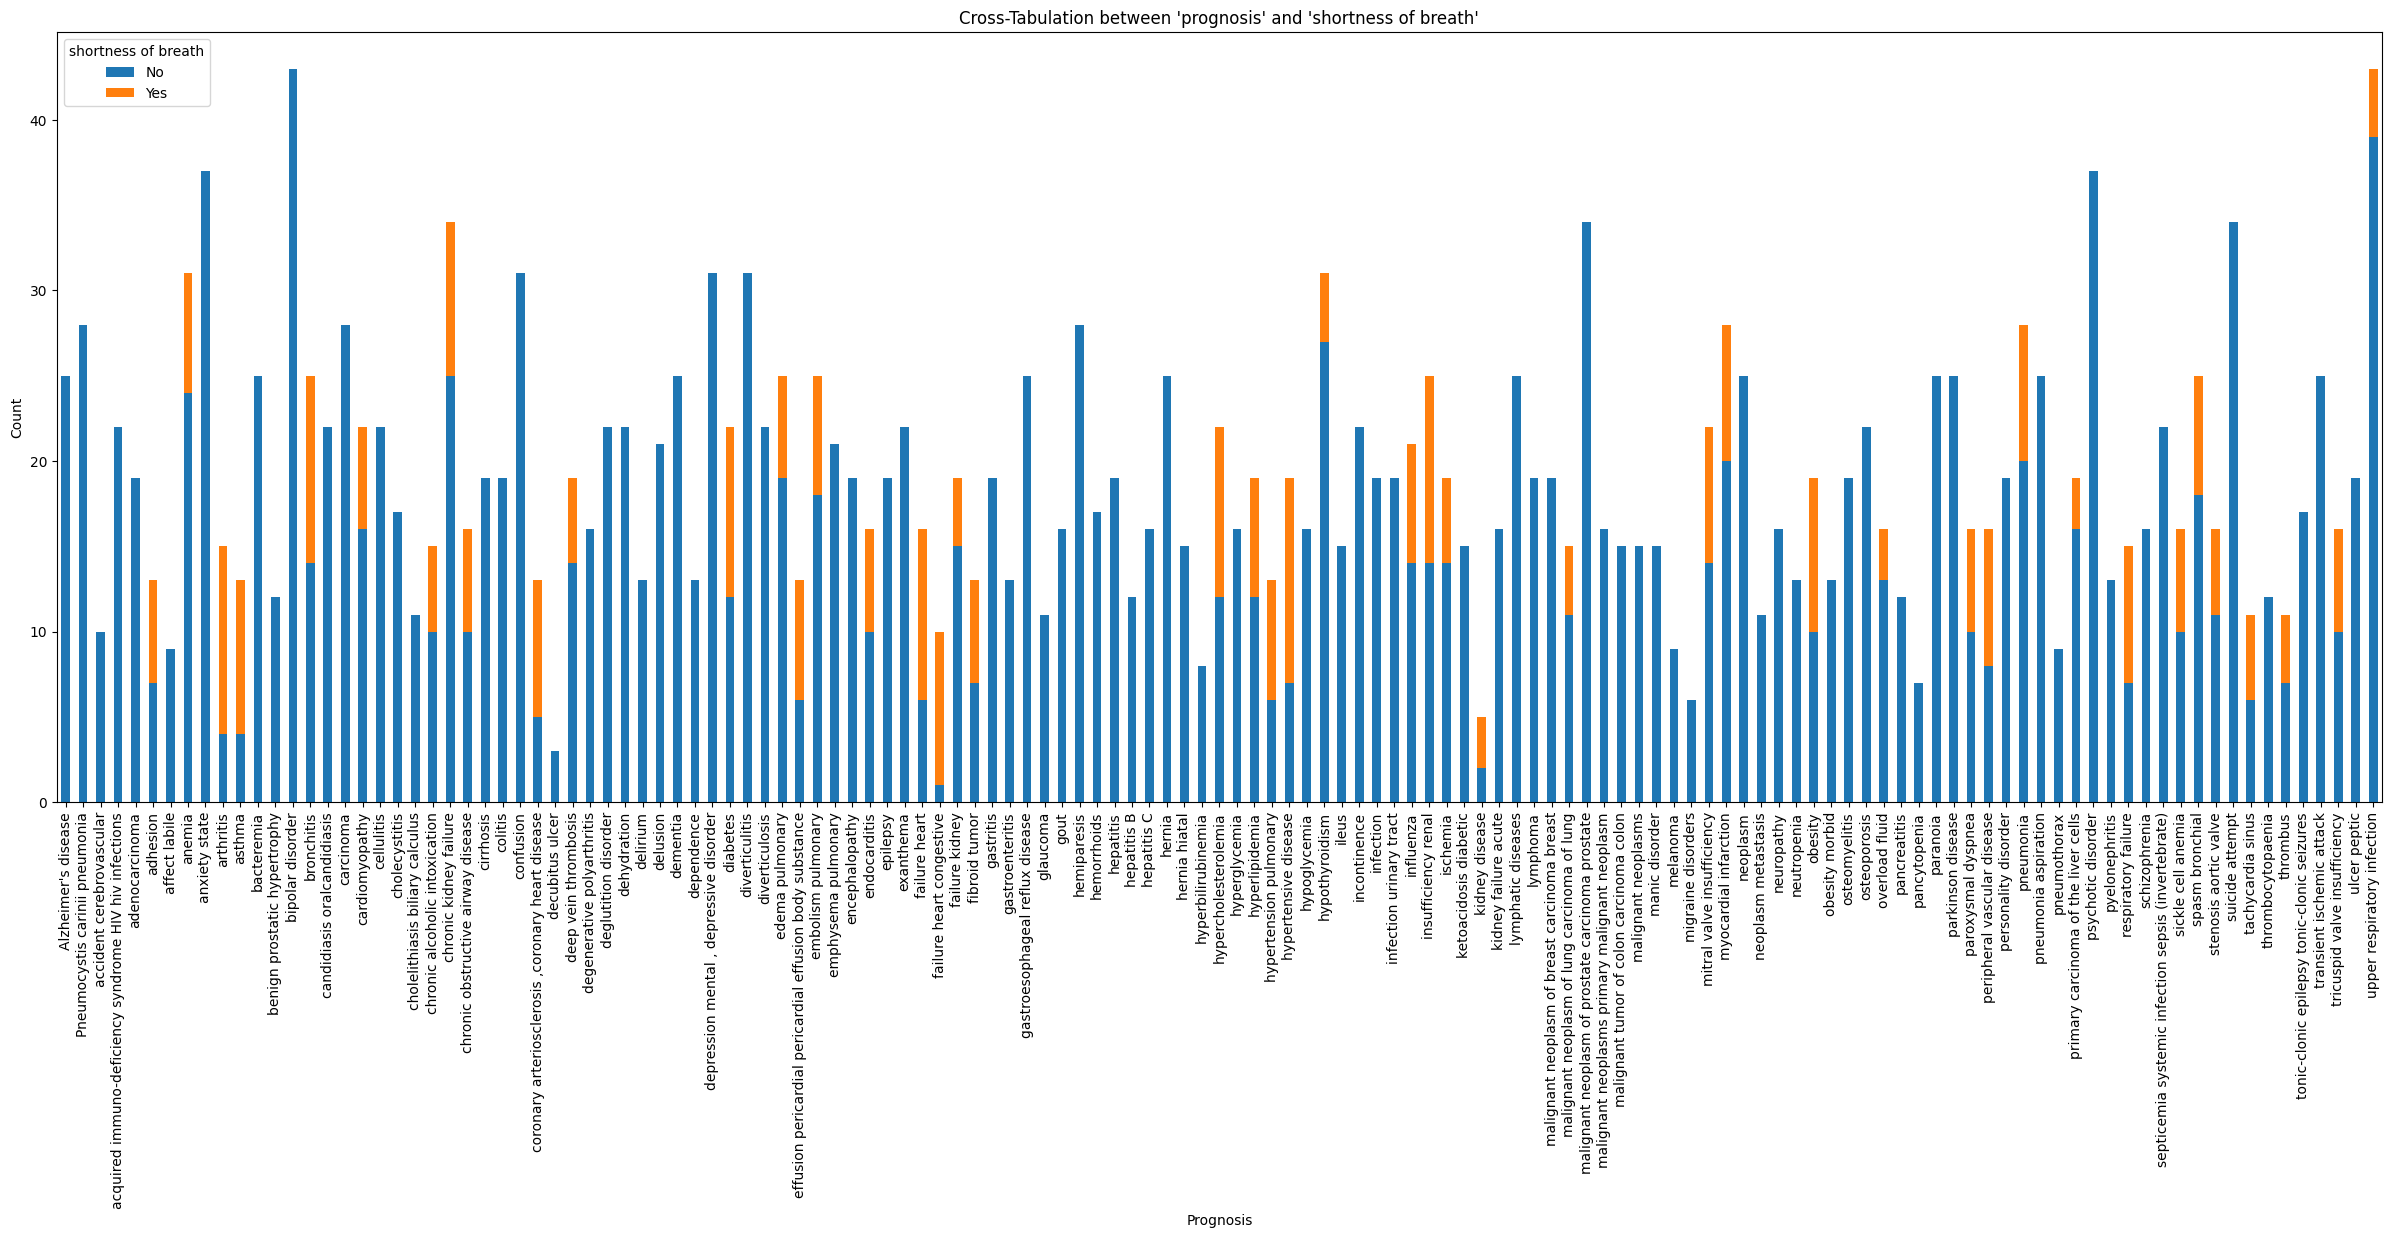

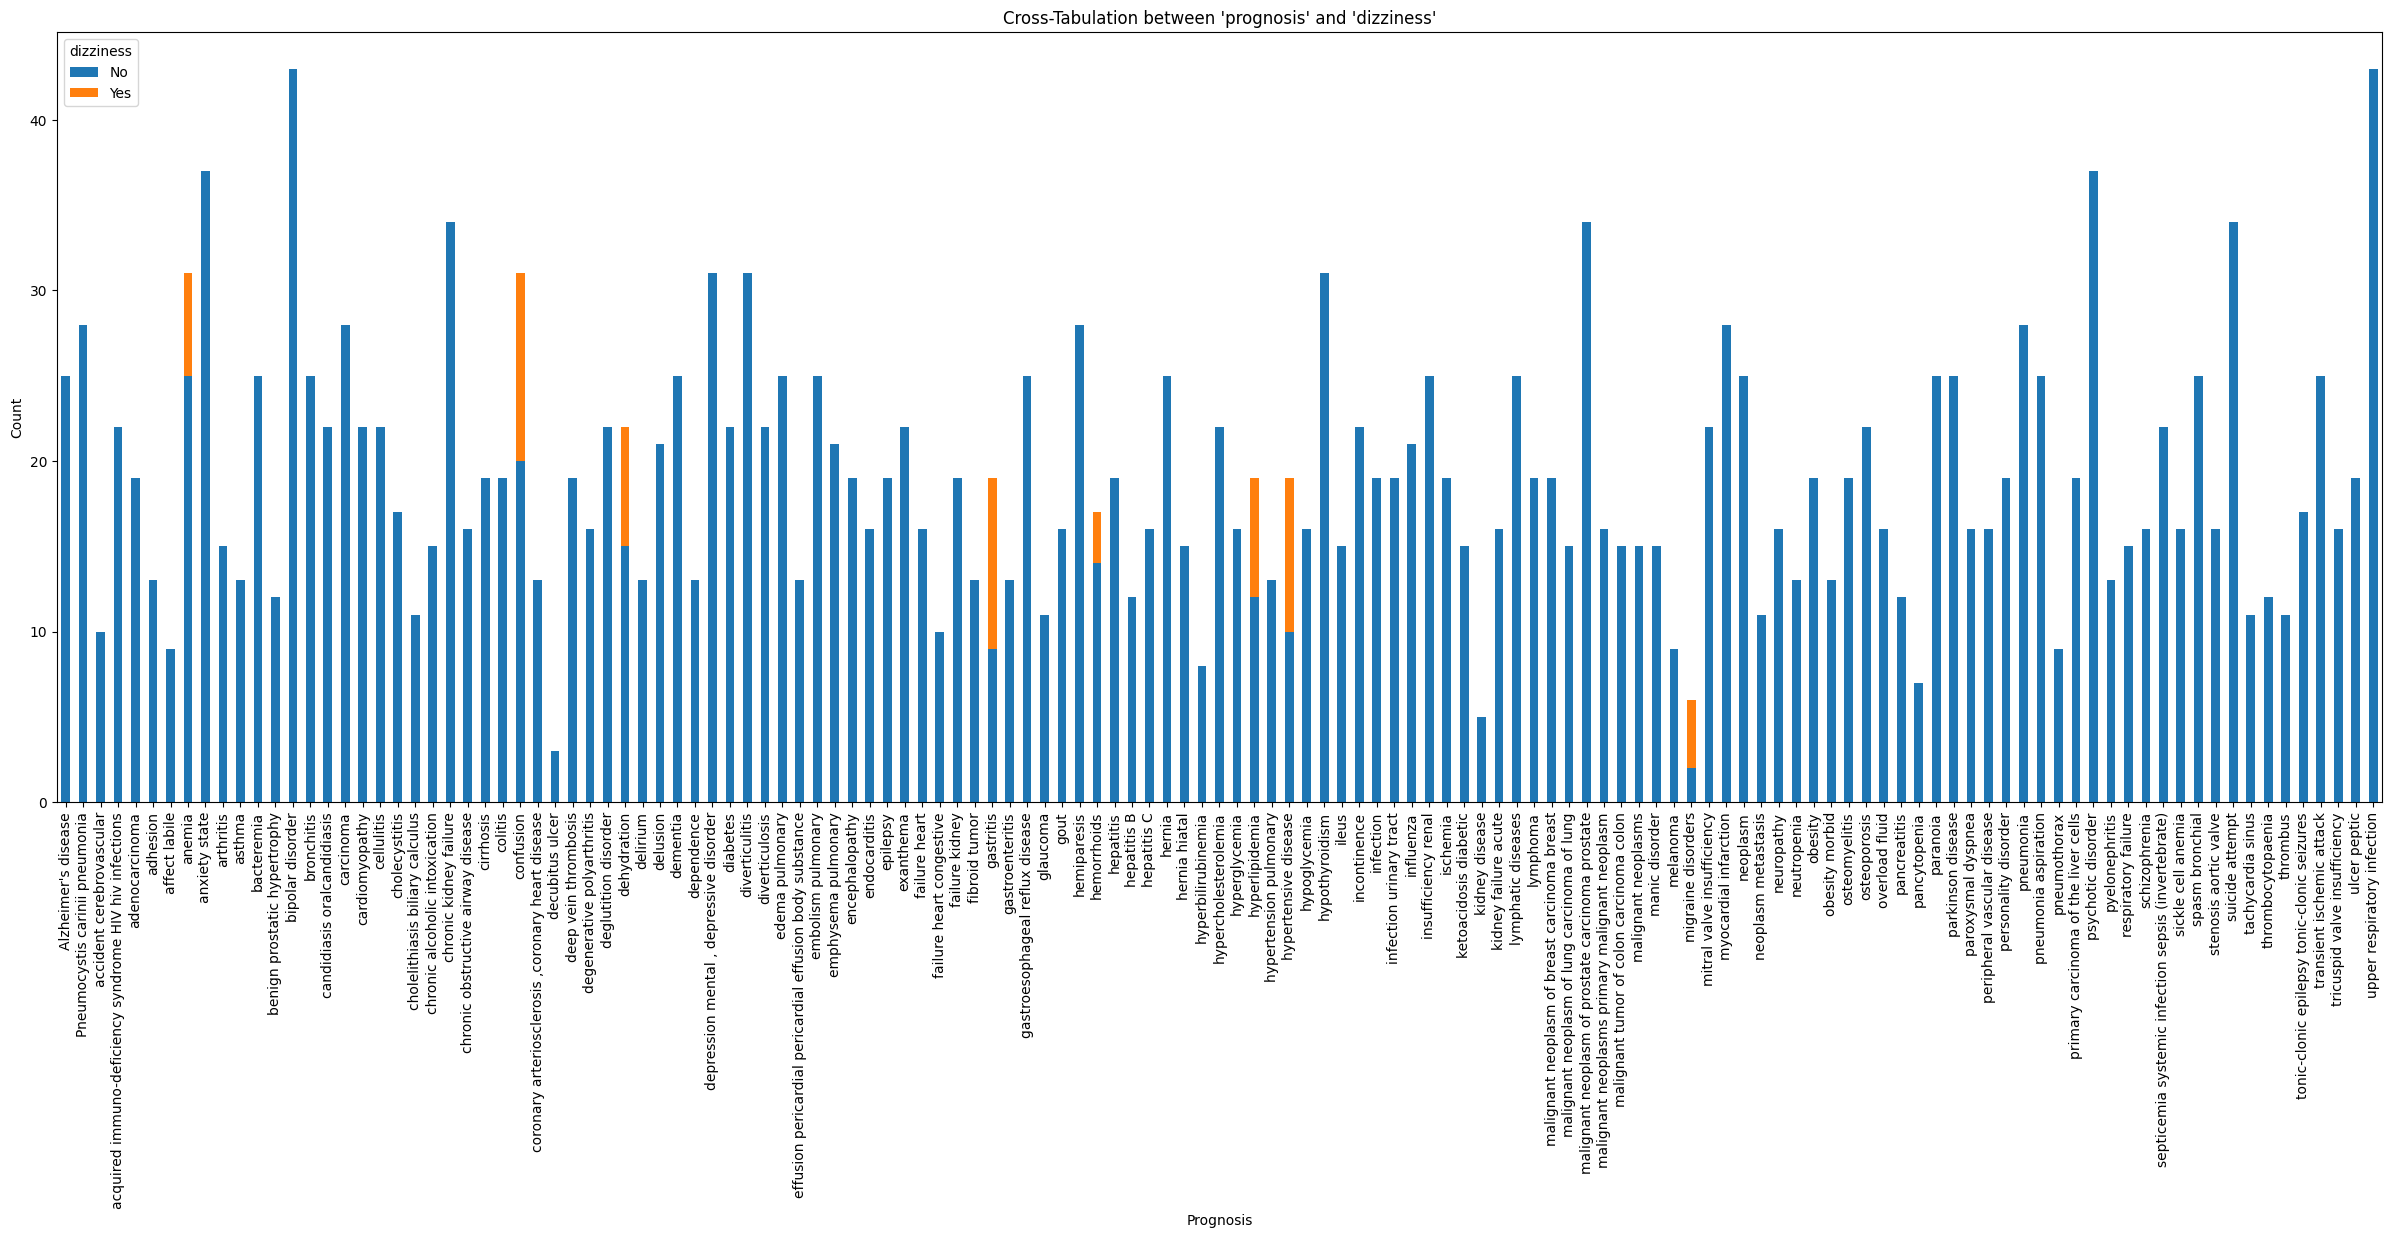

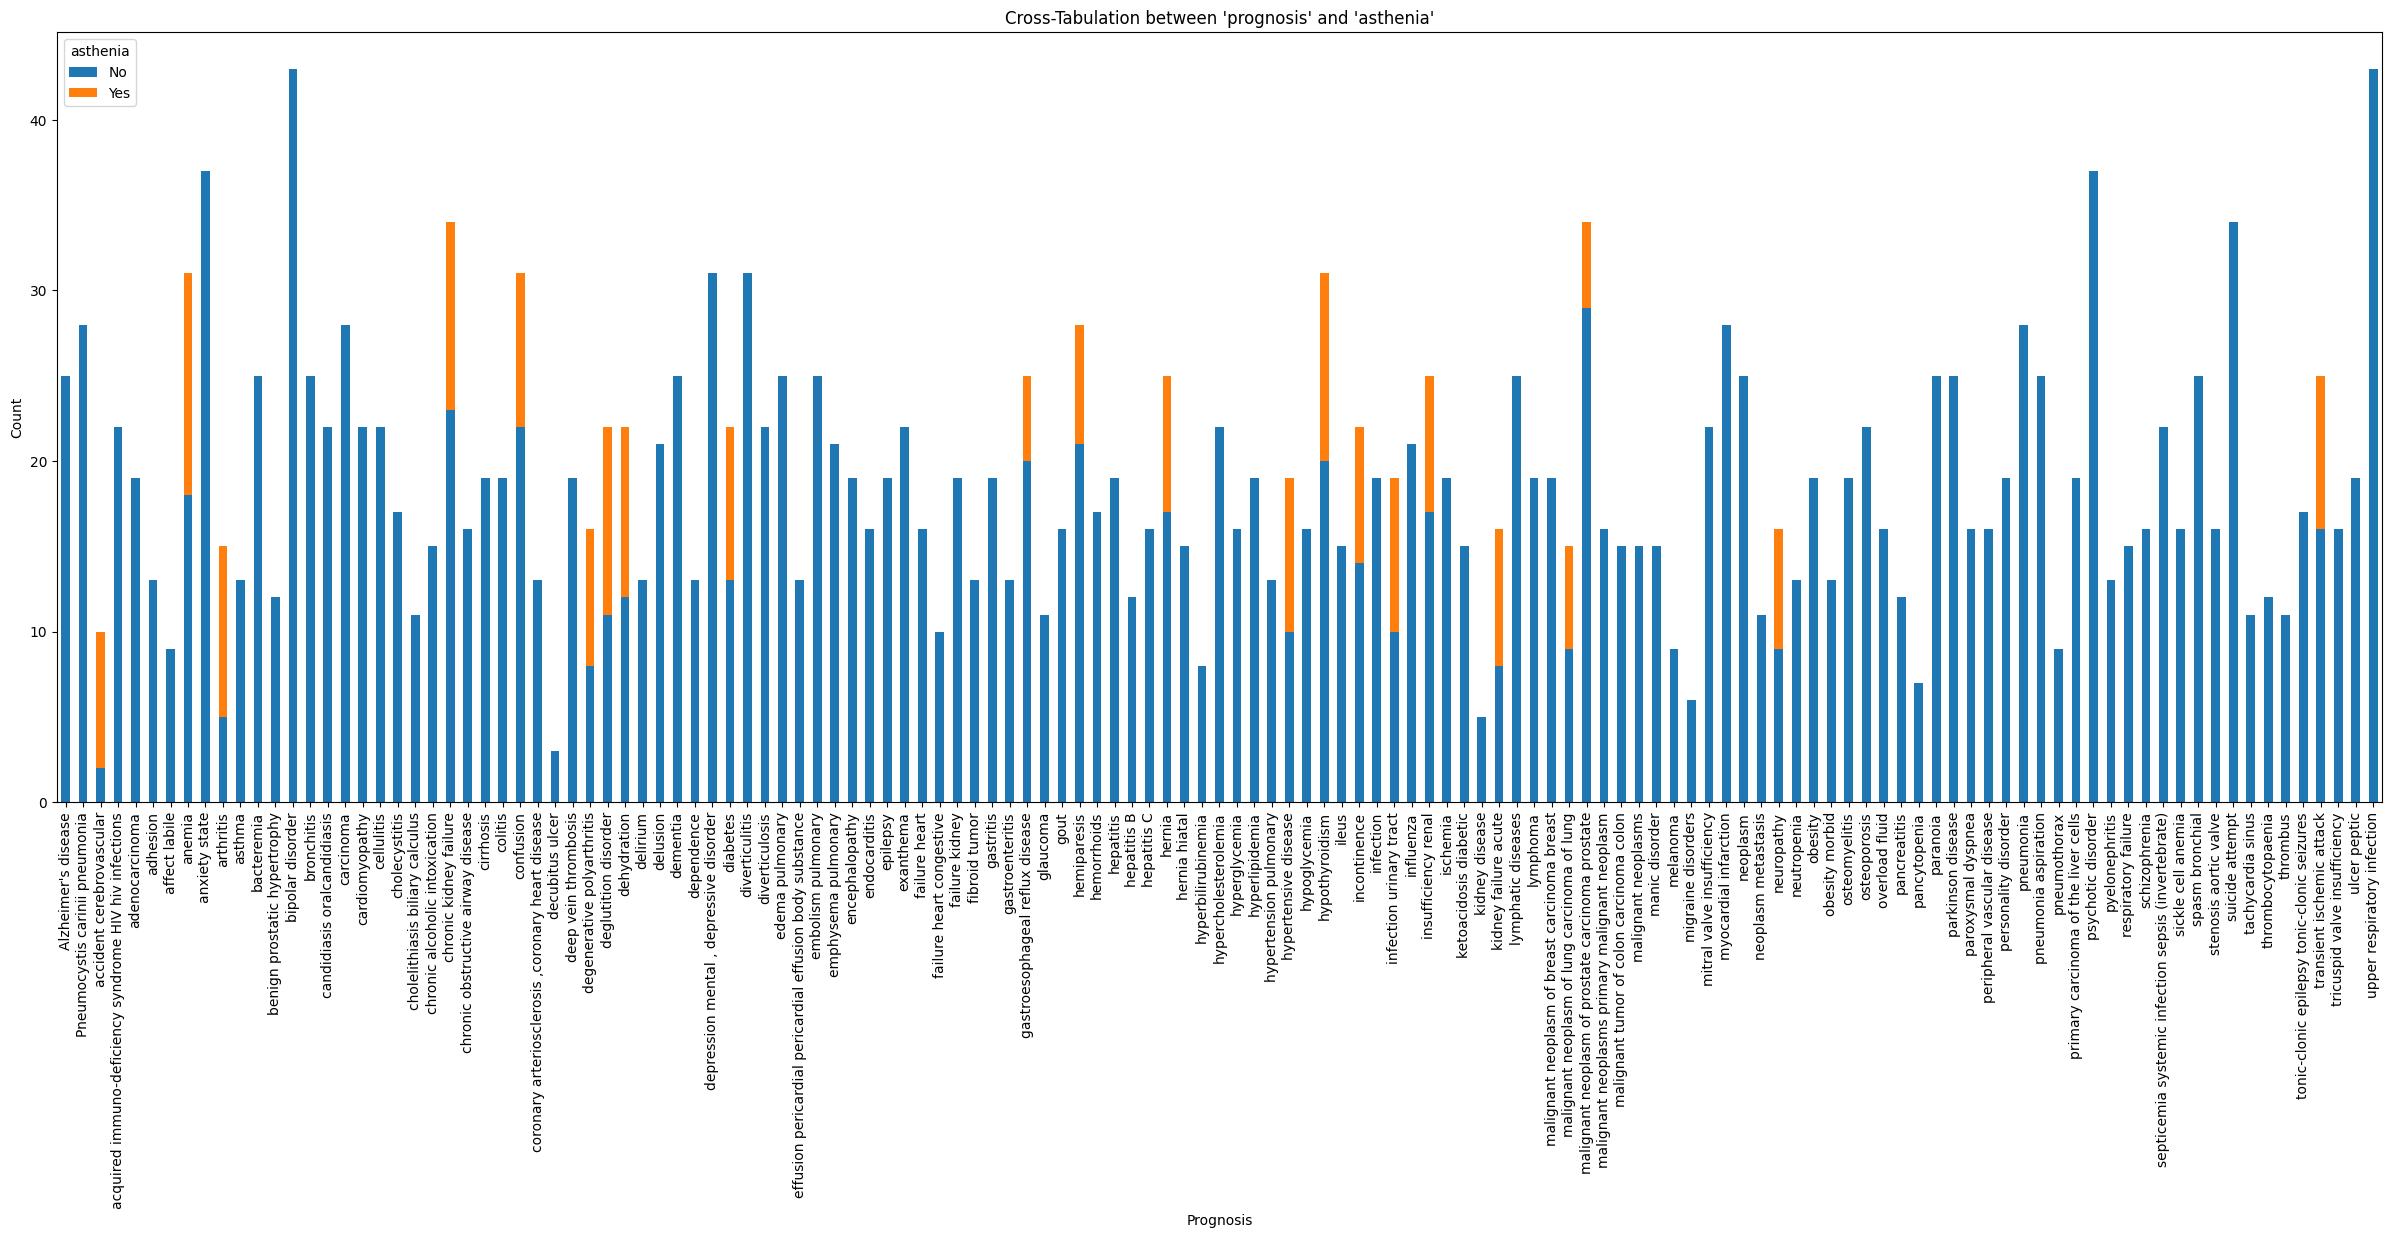

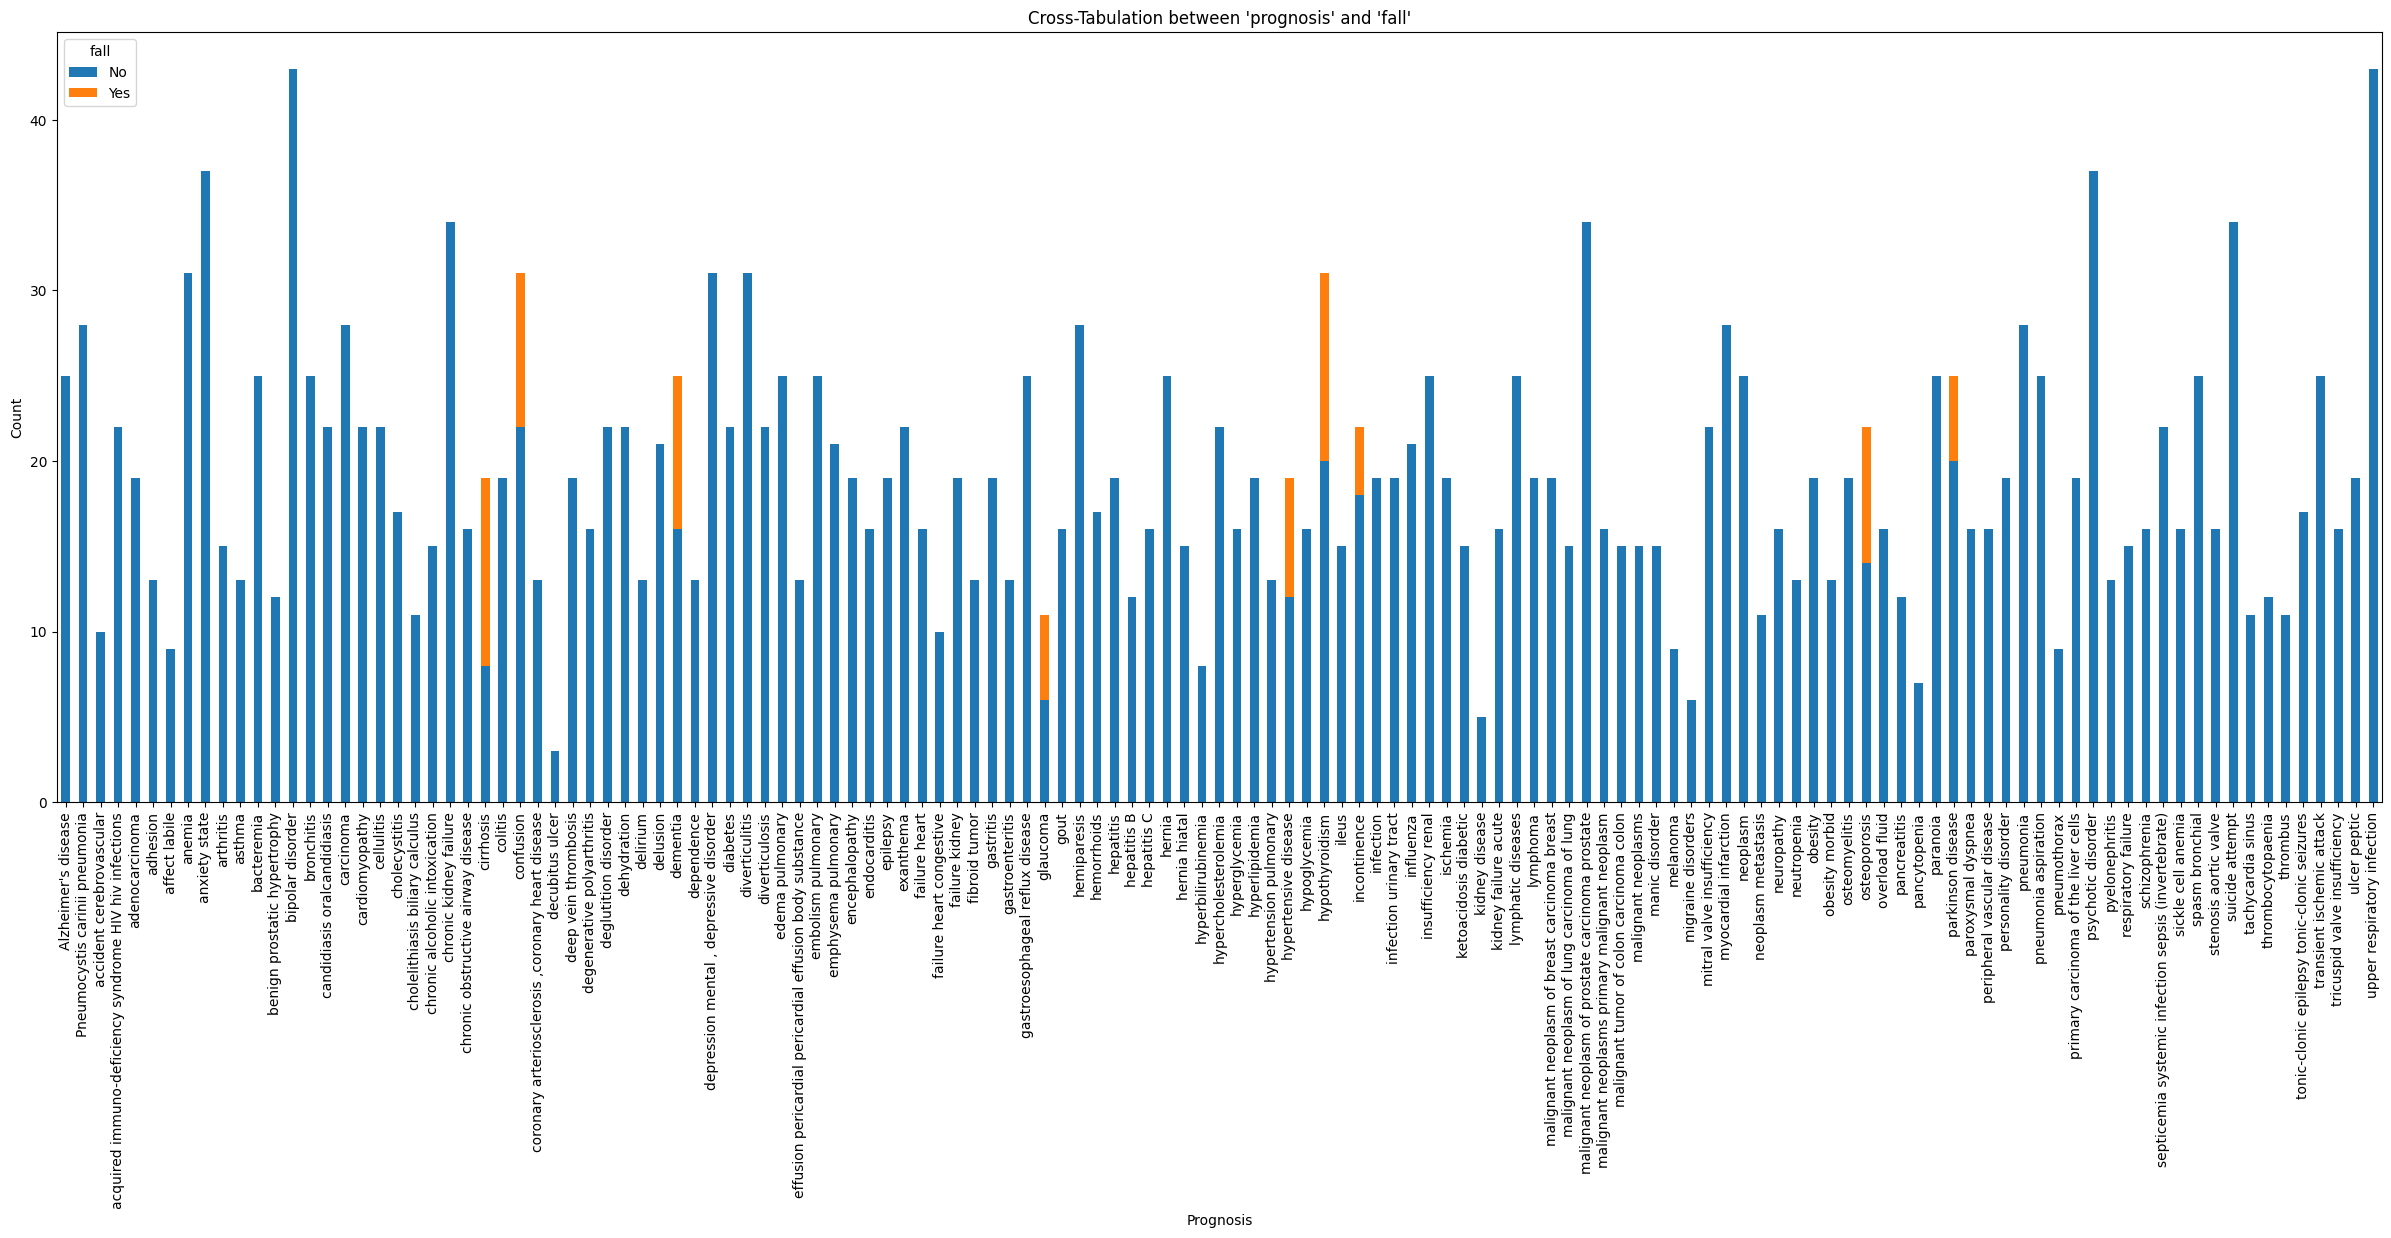

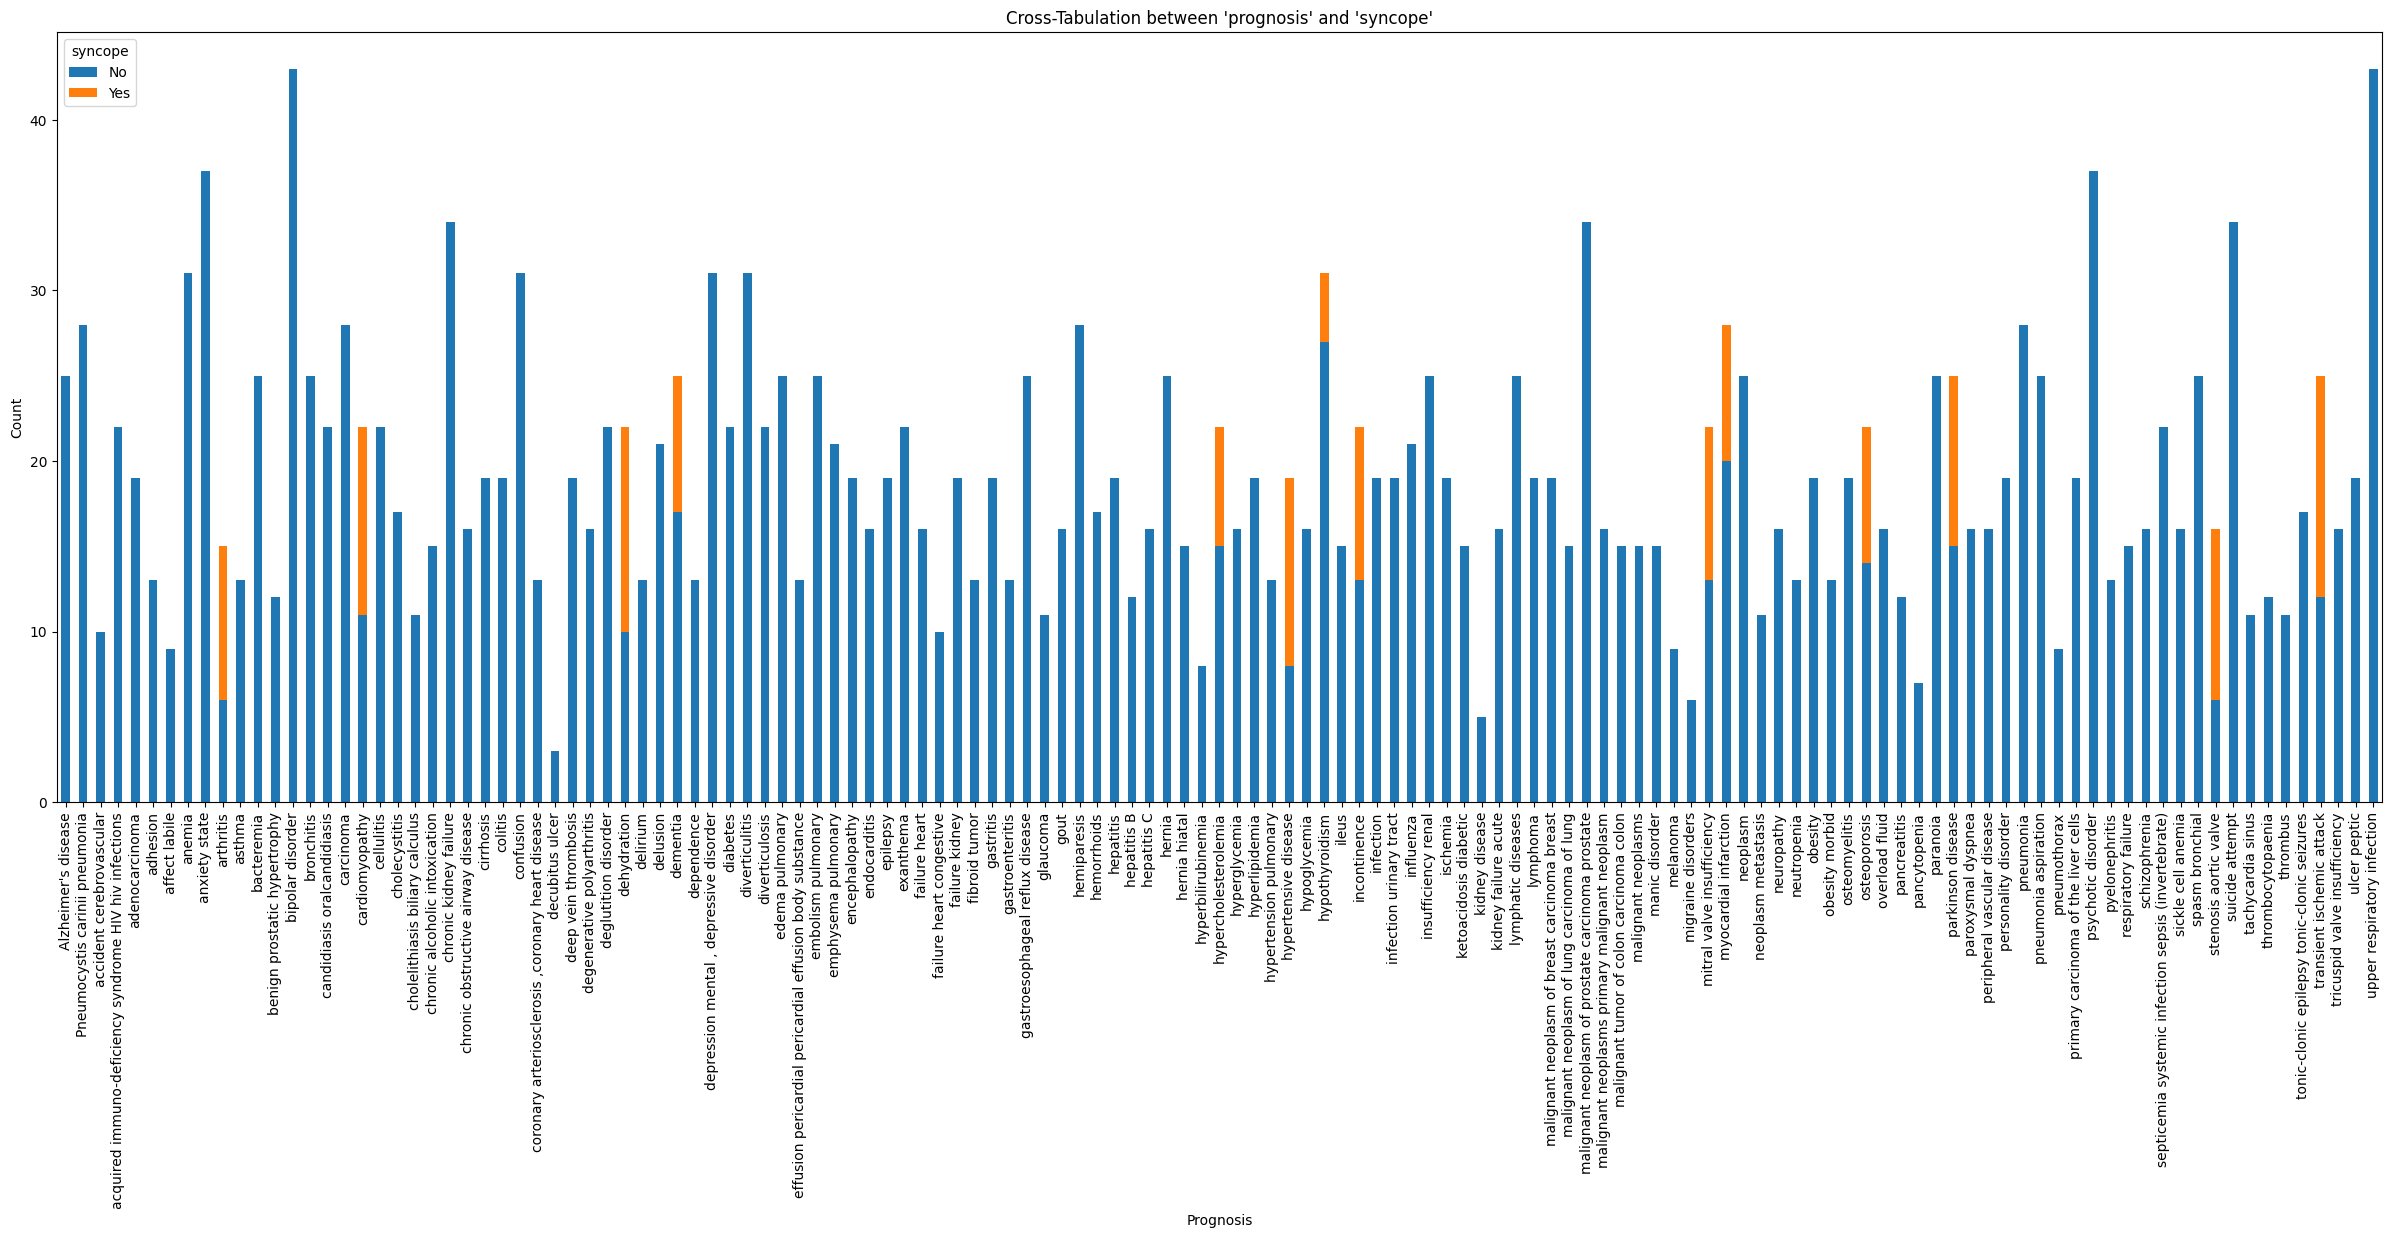

In [ ]:
for i, column in enumerate(df.columns[:6]):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column].map({1:'Yes',0:'No'}))
        cross_tab.plot(kind='bar', stacked=True,figsize=(30,10))

        plt.title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        plt.xlabel('Prognosis')
        plt.ylabel('Count')

<Axes: >

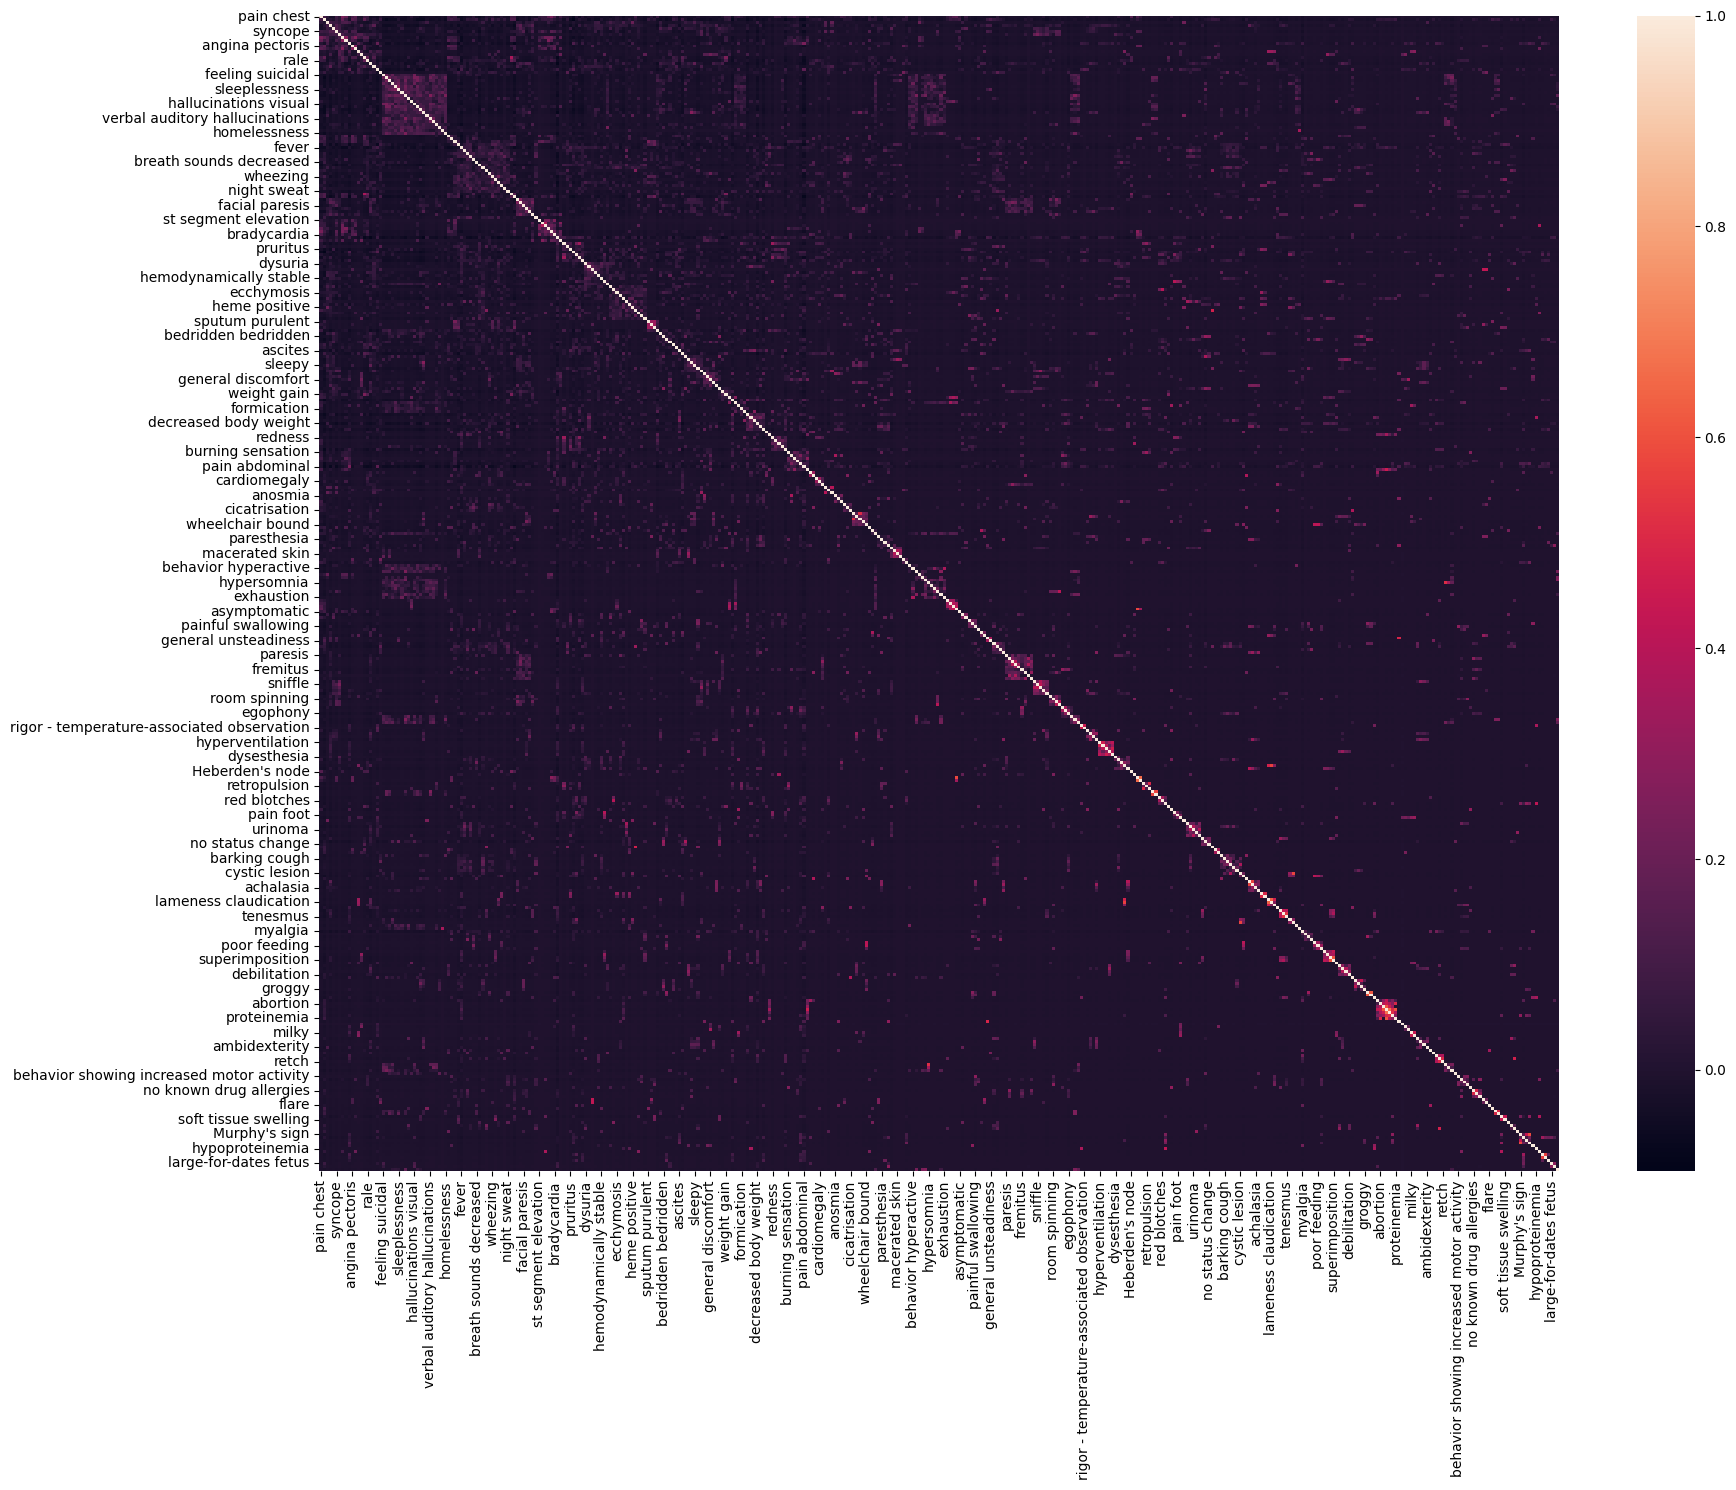

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop('prognosis',axis=1).corr(numeric_only=False))

Splitting the dataset into X and Y datasets

In [ ]:
X= df.drop(['prognosis'],axis=1)
Y=df['prognosis']

###Encoding

In [ ]:
le=LabelEncoder()
Y = le.fit_transform(Y)

###PCA

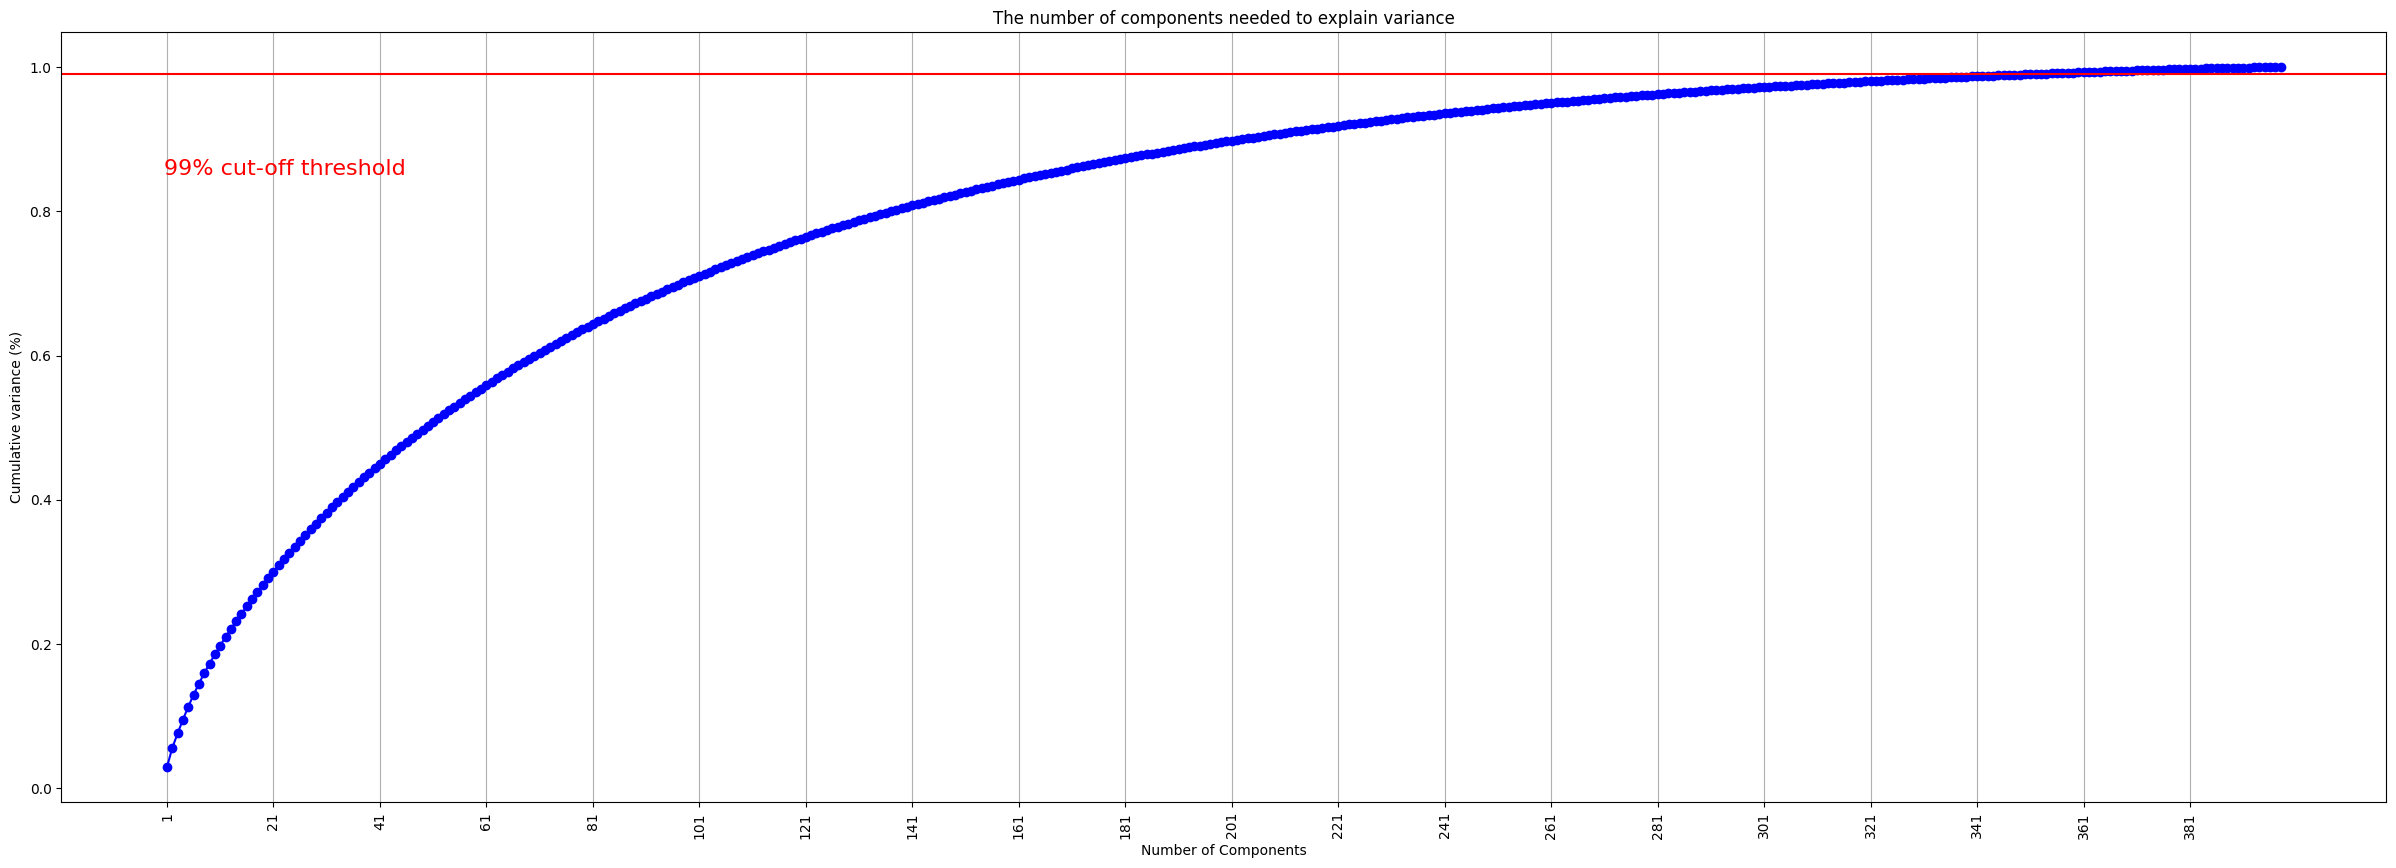

In [ ]:
pca = PCA()
pca.fit(X)

plt.rcParams["figure.figsize"] = (30,10)

fig, ax = plt.subplots()
xi = np.arange(1, 399 ,step=1)
y = np.cumsum(pca.explained_variance_ratio_)

# plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 399, step=20),rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

341 - 361 features are enough to explain 99% variance in the data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 351)
pca.fit(X)
X = pca.transform(X)

###SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='auto',k_neighbors=2)
X,Y = sm.fit_resample(X,Y)

In [ ]:
X.shape

(5719, 351)

###Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

###Model Training

In [ ]:
def model_train_test(model,X_train,y_train,X_test,y_test):

    #model training
    model.fit(X_train,y_train)

    #predict
    pred = model.predict(X_test)

    #accuracy score
    print("Accuracy score = ",round(accuracy_score(y_test,pred),4))
    print("Precision Score : ",round(precision_score(y_test, pred, pos_label='positive',average='micro'),4))
    print("Recall Score : ",round(recall_score(y_test, pred, pos_label='positive',average='micro'),4))


Decision Tree Classifer

In [ ]:
dt_model=DecisionTreeClassifier()
model_train_test(dt_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.7028
Precision Score :  0.7028
Recall Score :  0.7028


SVC

In [ ]:
svm_model=SVC()
model_train_test(svm_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.9886
Precision Score :  0.9886
Recall Score :  0.9886


K-Neighbors Classifier

In [ ]:
knn_model=KNeighborsClassifier()
model_train_test(knn_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.9336
Precision Score :  0.9336
Recall Score :  0.9336


Random Forest Classfier

In [ ]:
rf_model=RandomForestClassifier()
model_train_test(rf_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.9703
Precision Score :  0.9703
Recall Score :  0.9703


Bagging Classifier

In [ ]:
bagKNN_model=BaggingClassifier(KNeighborsClassifier())
model_train_test(bagKNN_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.9336
Precision Score :  0.9336
Recall Score :  0.9336


In [ ]:
bagSVC_model=BaggingClassifier(SVC())
model_train_test(bagSVC_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.9851
Precision Score :  0.9851
Recall Score :  0.9851


AdaBoostClassifier

In [ ]:
ada_model=AdaBoostClassifier()
model_train_test(ada_model,X_train, y_train, X_test, y_test)

Accuracy score =  0.0149
Precision Score :  0.0149
Recall Score :  0.0149


Both Bagging(with SVC()) and SVC are performing well but we are choosing Bagging because its and ensemble technique and offer comparatively low variance along with low Bias

Cross-val-score of bagSVC_model

In [ ]:
cross_val_score(bagSVC_model,X_train,y_train,n_jobs=-1).mean()

0.9792349726775956

Classification report

In [ ]:
print(classification_report(y_test,bagSVC_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         9
           6       1.00      0.86      0.92         7
           7       1.00      1.00      1.00         9
           8       0.57      1.00      0.73         4
           9       1.00      1.00      1.00        10
          10       1.00      0.91      0.95        11
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       0.78      0.64      0.70        11
          14       0.89      1.00      0.94         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00        10
          17       1.00    

In [ ]:
param={
    'bootstrap':(True,False),
    'n_estimators':[50,75,100],
    'max_features':[1.0,0.8,0.6],
    }

In [ ]:
clf = RandomizedSearchCV(bagSVC_model, param,n_jobs=-1,n_iter=5)

In [ ]:
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=BaggingClassifier(estimator=SVC()), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': (True, False),
                                        'max_features': [1.0, 0.8, 0.6],
                                        'n_estimators': [50, 75, 100]})

In [ ]:
clf.best_params_

{'n_estimators': 100, 'max_features': 0.6, 'bootstrap': True}

In [ ]:
clf.best_score_

0.9816393442622952

###Creating a pipeline

In [ ]:
pipe = Pipeline(
    [
      ('pca',PCA(n_components=351)),
      ('model',BaggingClassifier(SVC(),bootstrap=False,max_features=0.6,n_estimators=75))
    ]
)

In [ ]:
pipe.fit(df.drop('prognosis',axis=1),le.transform(df['prognosis']))

Pipeline(steps=[('pca', PCA(n_components=351)),
                ('model',
                 BaggingClassifier(bootstrap=False, estimator=SVC(),
                                   max_features=0.6, n_estimators=75))])

###Similar Diseases

In [ ]:
data=(df.groupby('prognosis').sum()>0)
similarity = cosine_similarity(data.iloc[:,1:])
similarity=pd.DataFrame(similarity)

In [ ]:
def similar(dis):
  idx = data.index.to_list().index(dis)
  distances = similarity[idx]
  dis_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:4]
  final_list=[]
  for i in dis_list:
    final_list.append(data.index[i[0]])
  return final_list

similar('myocardial infarction')

['hypercholesterolemia',
 'coronary arteriosclerosis ,coronary heart disease',
 'ischemia']

<Axes: >

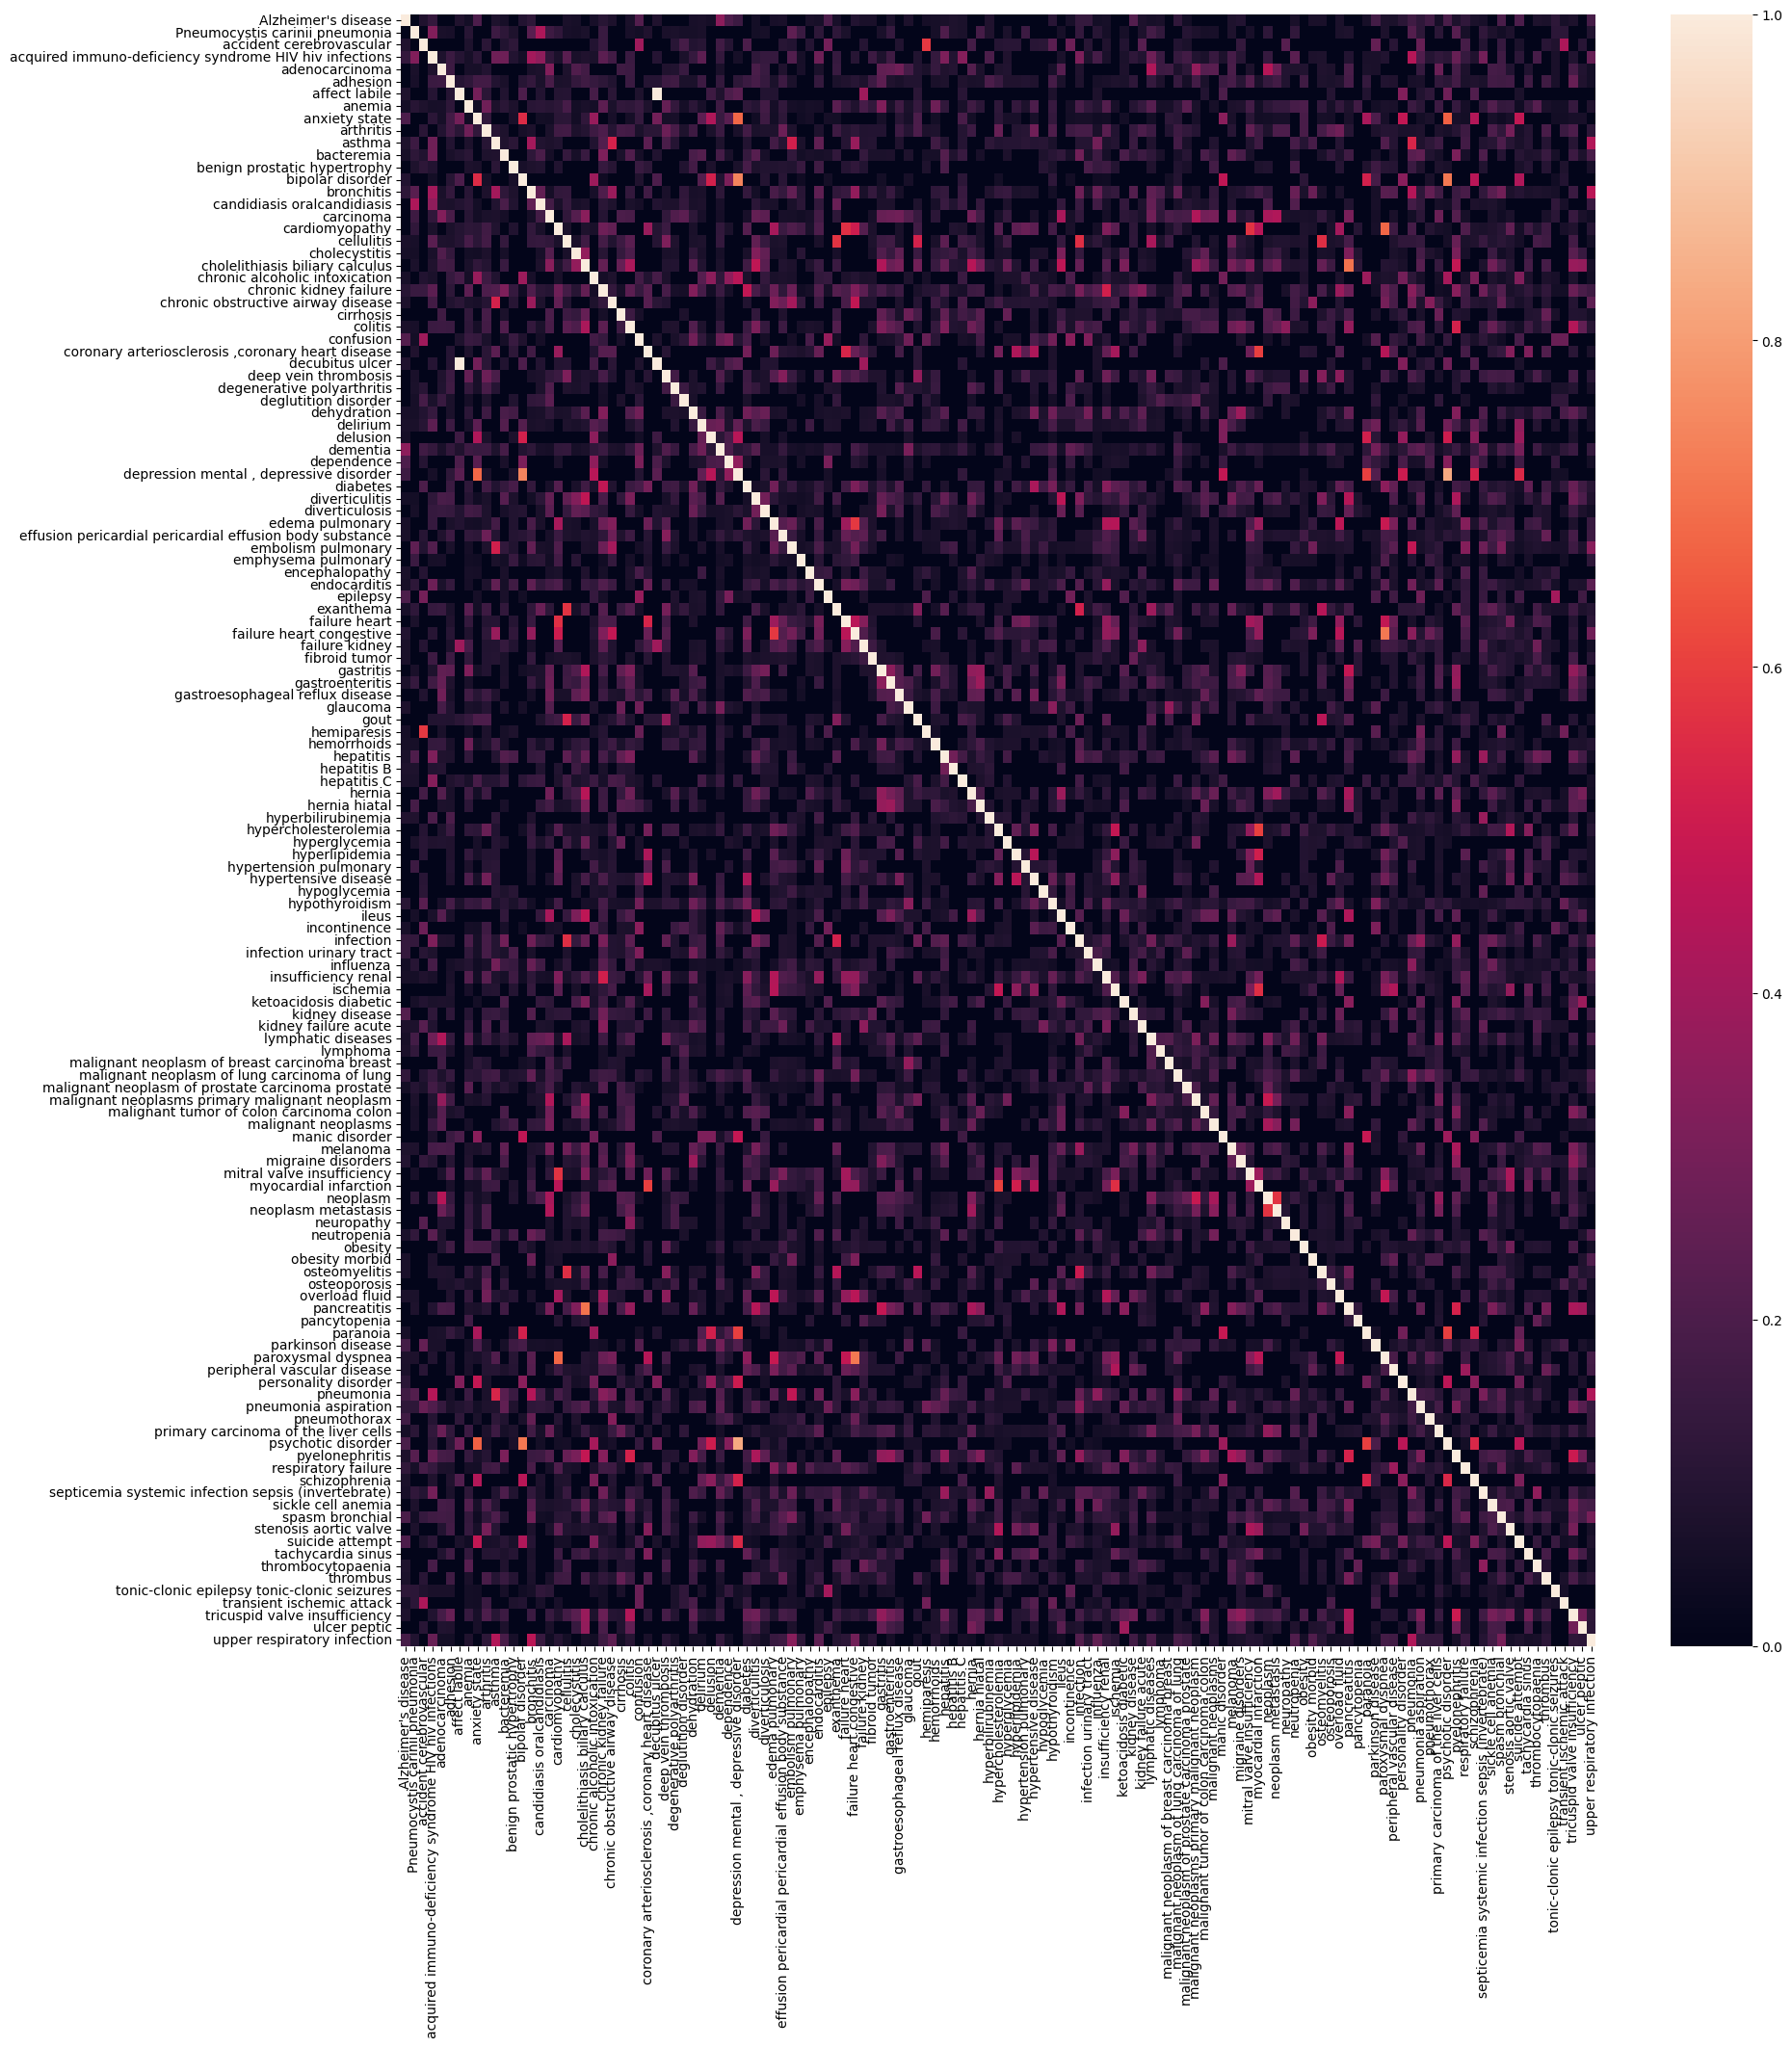

In [ ]:
fig, ax = plt.subplots(figsize=(20,22))
sns.heatmap(similarity,xticklabels=data.index,yticklabels=data.index,ax=ax)

###Pickle

In [ ]:
# data.to_csv('data_for_sim_dos.csv')

In [ ]:
# similarity.to_csv('similarity.csv')

In [ ]:
# import pickle
# pickle.dump(pipe,open('Project_model.pkl','wb'))
# pickle.dump(le,open('encoder.pkl','wb'))

In [ ]:
# with open('data', 'wb') as fp:
#     pickle.dump(data.index.to_list(), fp)